In [1]:
import pandas as pd

# 读取2021-2022.csv文件
df = pd.read_csv('Premier_League_data/2021-2022.csv')

# 创建得分字典
points = {}

# 遍历每一场比赛，更新得分字典
for index, row in df.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    ftr = row['FTR']
    if ftr == 'H':
        points[home_team] = points.get(home_team, 0) + 3
        points[away_team] = points.get(away_team, 0)
    elif ftr == 'A':
        points[home_team] = points.get(home_team, 0)
        points[away_team] = points.get(away_team, 0) + 3
    else:
        points[home_team] = points.get(home_team, 0) + 1
        points[away_team] = points.get(away_team, 0) + 1

# 将得分字典转换为DataFrame，并按得分排序
points_df = pd.DataFrame.from_dict(points, orient='index', columns=['Points']).sort_values('Points', ascending=False)

# 输出各球队最终得分
print(points_df)


                Points
Man City            93
Liverpool           92
Chelsea             74
Tottenham           71
Arsenal             69
Man United          58
West Ham            56
Leicester           52
Wolves              51
Brighton            51
Newcastle           49
Crystal Palace      48
Brentford           46
Aston Villa         45
Southampton         40
Everton             39
Leeds               38
Burnley             35
Watford             23
Norwich             22


In [2]:
# 每个赛季的总得分

import os
import pandas as pd

# 创建用于存储数据的文件夹
data_folder = 'Premier_League_data'

# 设置需要统计的赛季年份
seasons = range(2000, 2022)

# 初始化一个字典用于存储每个赛季的总得分
season_totals = {}

# 遍历每个赛季
for season in seasons:
    # 构造文件名
    filename = f'{data_folder}/{season}-{season+1}.csv'
    
    # 读取 CSV 文件
    df = pd.read_csv(filename, error_bad_lines=False)
    
    # 计算主队得分总和
    home_team_goals = df['FTHG'].sum()
    
    # 计算客队得分总和
    away_team_goals = df['FTAG'].sum()
    
    # 计算总得分
    total_goals = home_team_goals + away_team_goals
    
    # 将总得分存储在字典中
    season_totals[f'{season}-{season+1}'] = total_goals

# 输出每个赛季的总得分
for season, total_goals in season_totals.items():
    print(f'{season}: {total_goals}')


2000-2001: 992
2001-2002: 1001
2002-2003: 1000
2003-2004: 883
2004-2005: 851
2005-2006: 944
2006-2007: 931
2007-2008: 1002
2008-2009: 942
2009-2010: 1053
2010-2011: 1063
2011-2012: 1066
2012-2013: 1063
2013-2014: 1052
2014-2015: 975.0
2015-2016: 1026
2016-2017: 1064
2017-2018: 1018
2018-2019: 1072
2019-2020: 1034
2020-2021: 1024
2021-2022: 1071


/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_34442/2053052410.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, error_bad_lines=False)
/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_34442/2053052410.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, error_bad_lines=False)
/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_34442/2053052410.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, error_bad_lines=False)
/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_34442/2053052410.py:21: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future

In [3]:
import pandas as pd

# 读取 total_with_rank.csv 文件
ranked_df = pd.read_csv('Premier_League_data/total_with_rank.csv')

# 获取所有赛季
seasons = ranked_df['Season'].unique()

# 初始化一个字典用于存储每个赛季的结果
results_per_season = {}

# 遍历每个赛季
for season in seasons:
    # 获取该赛季的数据
    season_df = ranked_df[ranked_df['Season'] == season]

    # 找出前四名球队和最后三名球队
    champions_league_teams = season_df[season_df['Rank'] <= 4]['Team']
    relegated_teams = season_df[season_df['Rank'] > len(season_df) - 3]['Team']

    # 将结果存储在字典中
    results_per_season[season] = {
        'ChampionsLeague': champions_league_teams,
        'Relegated': relegated_teams
    }

# 输出每个赛季的结果
for season, results in results_per_season.items():
    print(f'{season}:')
    print('Champions League teams:')
    print(results['ChampionsLeague'].tolist())
    print('Relegated teams:')
    print(results['Relegated'].tolist())
    print()


2000-2001:
Champions League teams:
['Man United', 'Arsenal', 'Liverpool', 'Leeds']
Relegated teams:
['Man City', 'Coventry', 'Bradford']

2001-2002:
Champions League teams:
['Arsenal', 'Liverpool', 'Man United', 'Newcastle']
Relegated teams:
['Ipswich', 'Derby', 'Leicester']

2002-2003:
Champions League teams:
['Man United', 'Arsenal', 'Newcastle', 'Chelsea']
Relegated teams:
['West Ham', 'West Brom', 'Sunderland']

2003-2004:
Champions League teams:
['Arsenal', 'Chelsea', 'Man United', 'Liverpool']
Relegated teams:
['Leicester', 'Wolves', 'Leeds']

2004-2005:
Champions League teams:
['Chelsea', 'Arsenal', 'Man United', 'Everton']
Relegated teams:
['Southampton', 'Norwich', 'Crystal Palace']

2005-2006:
Champions League teams:
['Chelsea', 'Man United', 'Liverpool', 'Arsenal']
Relegated teams:
['Birmingham', 'West Brom', 'Sunderland']

2006-2007:
Champions League teams:
['Man United', 'Chelsea', 'Arsenal', 'Liverpool']
Relegated teams:
['Sheffield United', 'Charlton', 'Watford']

2007-2

In [4]:
import pandas as pd

# 读取 total.csv 文件
total_df = pd.read_csv('Premier_League_data/total.csv')

# 获取所有赛季
seasons = total_df['Season'].unique()

# 初始化一个集合用于存储所有出现过的球队
all_teams = set(total_df['Team'].unique())

# 初始化一个集合用于存储降级过的球队
relegated_teams = set()

# 遍历每个赛季
for season in seasons:
    # 获取该赛季的数据
    season_df = total_df[total_df['Season'] == season]

    # 按照积分、净胜球、进球数对球队进行排序
    season_df = season_df.sort_values(by=['Points', 'Goals', 'Conceded'], ascending=[False, False, True])

    # 获取降级的球队
    relegated = season_df.iloc[-3:]['Team'].values

    # 将降级球队添加到降级过的球队集合中
    relegated_teams.update(relegated)

# 计算从未降级的球队
never_relegated_teams = all_teams - relegated_teams

# 打印从未降级的球队
print("从未降级的球队：")
for team in never_relegated_teams:
    print(team)


从未降级的球队：
Everton
Arsenal
Chelsea
Tottenham
Brentford
Man United
Brighton
Liverpool


In [5]:
import pandas as pd

# 读取 total.csv 文件
total_df = pd.read_csv('Premier_League_data/total.csv')

# 获取所有赛季
seasons = total_df['Season'].unique()

# 初始化一个列表用于存储曼城降级的赛季
relegated_seasons = []

# 遍历每个赛季
for season in seasons:
    # 获取该赛季的数据
    season_df = total_df[total_df['Season'] == season]

    # 按照积分、净胜球、进球数对球队进行排序
    season_df = season_df.sort_values(by=['Points', 'Goals', 'Conceded'], ascending=[False, False, True])

    # 获取降级的球队
    relegated = season_df.iloc[-3:]

    # 检查曼城是否在降级球队中
    if 'Man City' in relegated['Team'].values:
        relegated_seasons.append(season)

# 打印曼城降级的赛季
print("曼城降级的赛季：")
for season in relegated_seasons:
    print(season)


曼城降级的赛季：
2000-2001


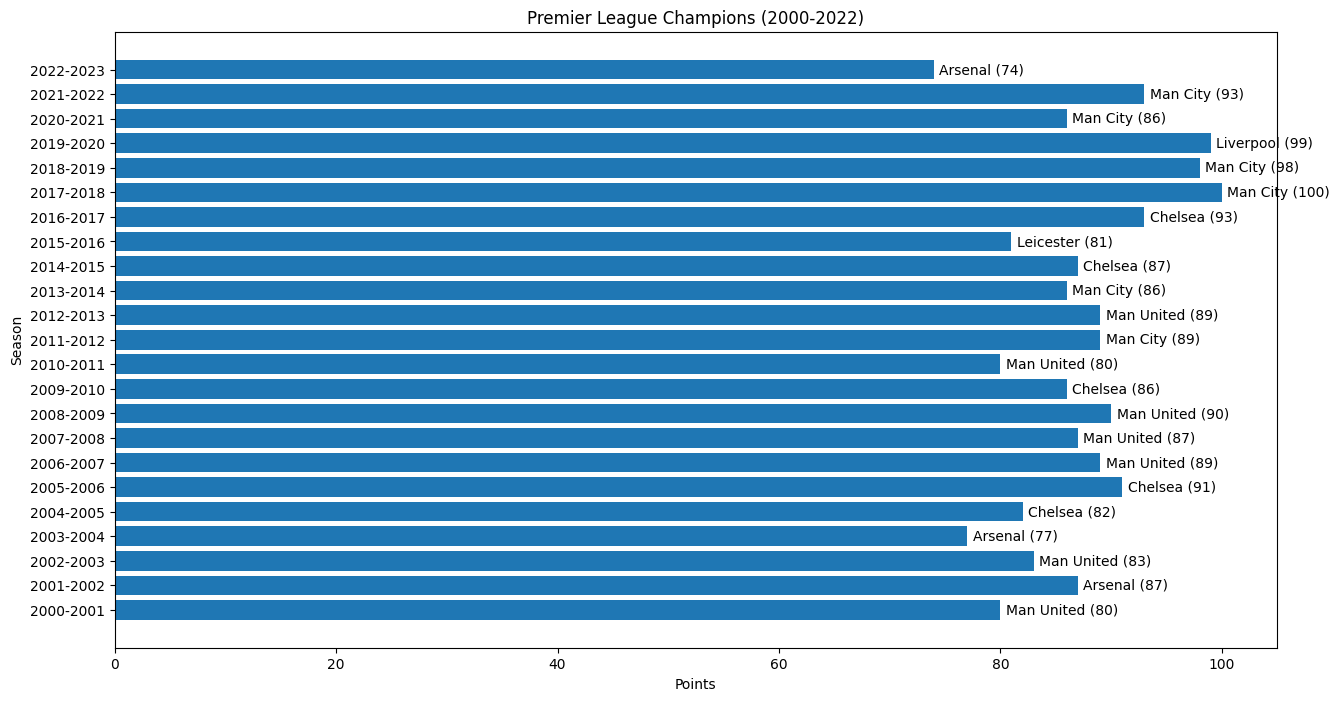

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 total_with_rank.csv 文件
ranked_df = pd.read_csv('Premier_League_data/total_with_rank.csv')

# 获取所有赛季
seasons = ranked_df['Season'].unique()

# 初始化列表用于存储冠军球队和得分
champions = []
champion_points = []

# 遍历每个赛季
for season in seasons:
    # 获取该赛季的数据
    season_df = ranked_df[ranked_df['Season'] == season]

    # 提取冠军球队
    champion = season_df[season_df['Rank'] == 1]
    champions.append(champion['Team'].values[0])
    champion_points.append(champion['Points'].values[0])

# 设置绘图参数
plt.figure(figsize=(15, 8))
plt.barh(seasons, champion_points)
plt.xlabel('Points')
plt.ylabel('Season')
plt.title('Premier League Champions (2000-2022)')

# 添加球队名和得分标签
for i, (season, points, team) in enumerate(zip(seasons, champion_points, champions)):
    plt.text(points + 0.5, i, f"{team} ({points})", ha='left', va='center')

# 显示图表
plt.show()


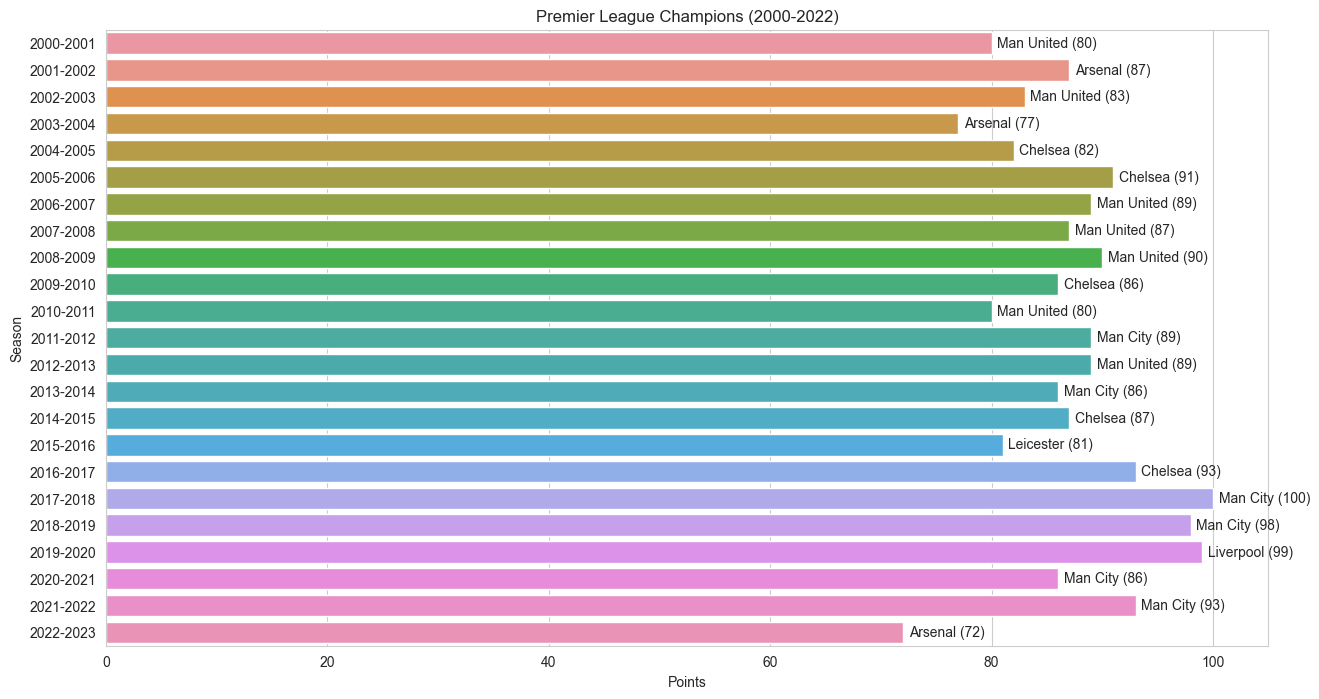

In [6]:
# 1.各赛季的冠军及其分数
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 6)

# 读取 total_with_rank.csv 文件
ranked_df = pd.read_csv('Premier_League_data/total_with_rank.csv')

# 获取所有赛季
seasons = ranked_df['Season'].unique()

# 初始化列表用于存储冠军球队和得分
champions = []
champion_points = []

# 遍历每个赛季
for season in seasons:
    # 获取该赛季的数据
    season_df = ranked_df[ranked_df['Season'] == season]

    # 提取冠军球队
    champion = season_df[season_df['Rank'] == 1]
    champions.append(champion['Team'].values[0])
    champion_points.append(champion['Points'].values[0])

# 设置绘图参数
plt.figure(figsize=(15, 8))
sns.barplot(x=champion_points, y=seasons, orient="h")

plt.xlabel('Points')
plt.ylabel('Season')
plt.title('Premier League Champions (2000-2022)')

# 添加球队名和得分标签
for i, (season, points, team) in enumerate(zip(seasons, champion_points, champions)):
    plt.text(points + 0.5, i, f"{team} ({points})", ha='left', va='center')

# 显示图表
plt.show()


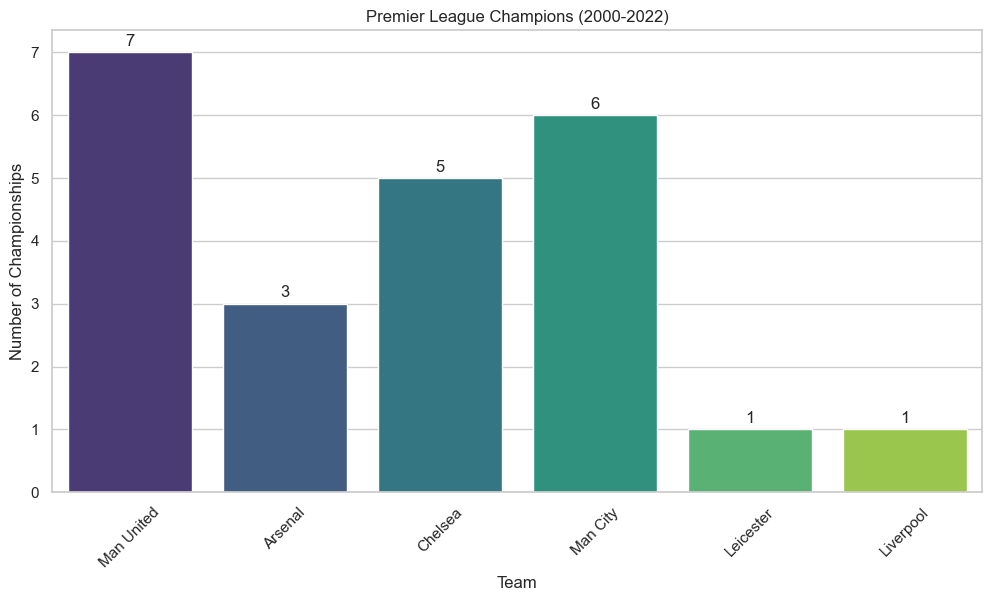

In [29]:
# 2.冠军次数
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 total_with_rank.csv 文件
ranked_df = pd.read_csv('Premier_League_data/total_with_rank.csv')

# 获取所有赛季
seasons = ranked_df['Season'].unique()

# 初始化字典用于存储冠军球队的次数
champion_count = {}

# 遍历每个赛季
for season in seasons:
    # 获取该赛季的数据
    season_df = ranked_df[ranked_df['Season'] == season]

    # 提取冠军球队
    champion = season_df[season_df['Rank'] == 1]['Team'].values[0]

    # 记录冠军球队的次数
    champion_count[champion] = champion_count.get(champion, 0) + 1

# 创建一个新的 DataFrame，包含获得冠军的球队次数
champion_df = pd.DataFrame({'Champion': pd.Series(champion_count)}).fillna(0)
# print(champion_df)
# 设置 seaborn 主题和风格
sns.set_theme(style="whitegrid")

# 绘制柱状图
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(champion_count.keys()), y=list(champion_count.values()), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Number of Championships')
plt.title('Premier League Champions (2000-2022)')

# 添加数据标签
for i, count in enumerate(champion_count.values()):
    plt.text(i, count + 0.1, int(count), ha='center')

# 显示图表
plt.show()


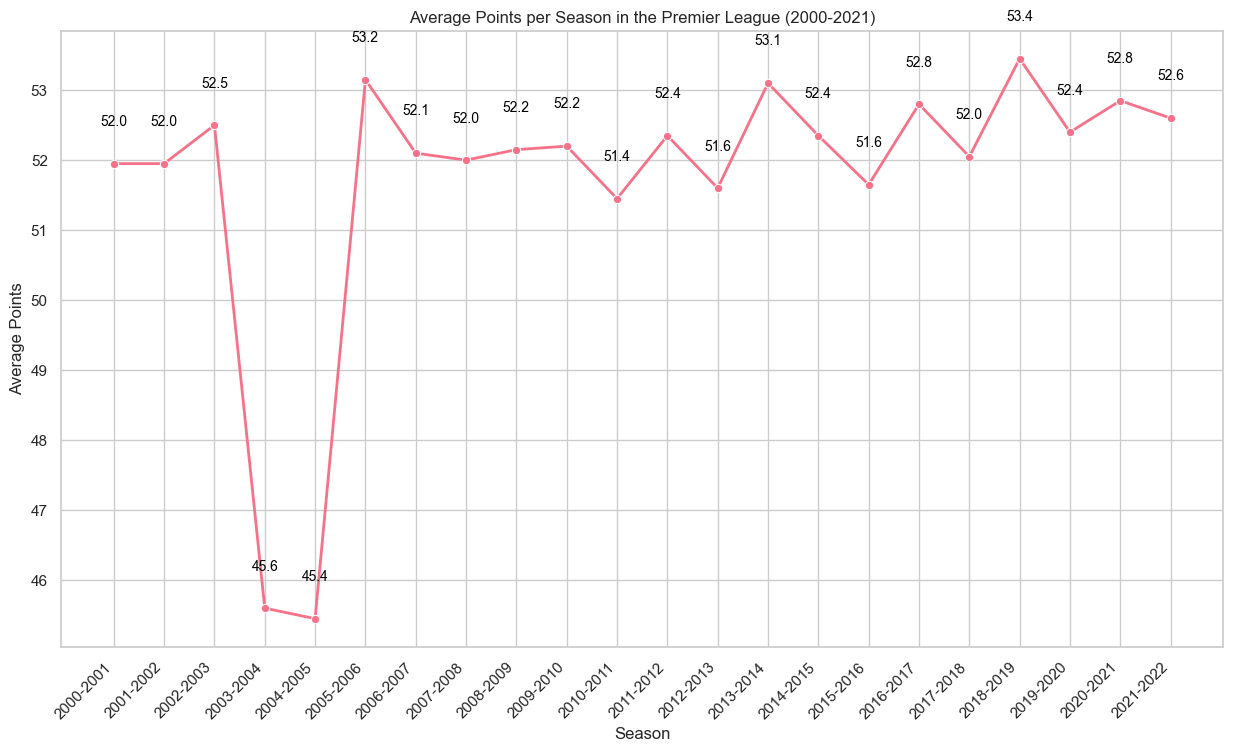

In [9]:
# 3.各赛季的平均得分
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 6)

# 读取 total_with_rank.csv 文件
ranked_df = pd.read_csv('Premier_League_data/total_with_rank.csv')

# 获取所有赛季
seasons = ranked_df['Season'].unique()

# 初始化列表用于存储每个赛季的平均得分
avg_points = []

# 遍历每个赛季
for season in seasons:
    if int(season.split('-')[0]) > 2021:  # 只显示 2000-2021 赛季
        continue

    # 获取该赛季的数据
    season_df = ranked_df[ranked_df['Season'] == season]

    # 计算该赛季的平均得分
    avg_points.append(season_df['Points'].mean())

# 设置绘图参数
plt.figure(figsize=(15, 8))
sns.lineplot(x=seasons[:len(avg_points)], y=avg_points, marker='o', lw=2)

plt.xlabel('Season')
plt.ylabel('Average Points')
plt.title('Average Points per Season in the Premier League (2000-2021)')

# 设置 X 轴标签旋转
plt.xticks(rotation=45, ha='right')

# 添加得分标签
for season, points in zip(seasons[:len(avg_points)], avg_points):
    plt.text(season, points + 0.5, f"{round(points, 1)}", ha='center', va='bottom', fontsize=10, color='black')

# 显示图表
plt.show()

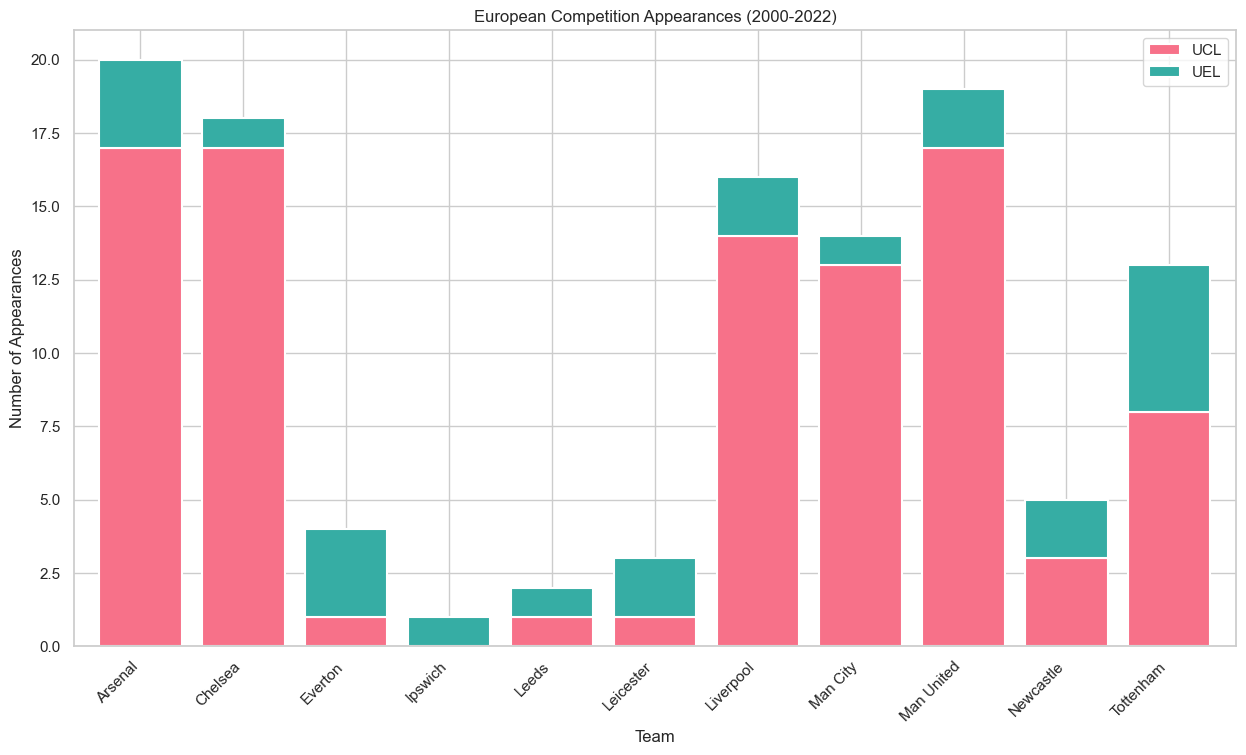

In [31]:
# 4.参加欧战的次数
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 2)

# 读取 total_with_rank.csv 文件
ranked_df = pd.read_csv('Premier_League_data/total_with_rank.csv')

# 获取所有赛季
seasons = ranked_df['Season'].unique()

# 初始化字典用于存储参加欧冠和欧联的球队次数
ucl_count = {}
uel_count = {}

# 遍历每个赛季
for season in seasons:
    # 获取该赛季的数据
    season_df = ranked_df[ranked_df['Season'] == season]

    # 提取前五名球队
    top5 = season_df[season_df['Rank'] <= 5]

    # 将前四名球队分配给欧冠
    for team in top5[top5['Rank'] <= 4]['Team']:
        if team not in ucl_count:
            ucl_count[team] = 1
        else:
            ucl_count[team] += 1

    # 将第五名球队分配给欧联
    team = top5[top5['Rank'] == 5]['Team'].values[0]
    if team not in uel_count:
        uel_count[team] = 1
    else:
        uel_count[team] += 1

# 创建一个新的 DataFrame，包含参加欧冠和欧联的球队次数
euro_df = pd.DataFrame({'UCL': pd.Series(ucl_count), 'UEL': pd.Series(uel_count)}).fillna(0)

# 绘制堆叠柱状图
ax = euro_df.plot.bar(stacked=True, figsize=(15, 8), width=0.8, edgecolor='white', linewidth=1.5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Team')
plt.ylabel('Number of Appearances')
plt.title('European Competition Appearances (2000-2022)')

# 显示图表
plt.show()


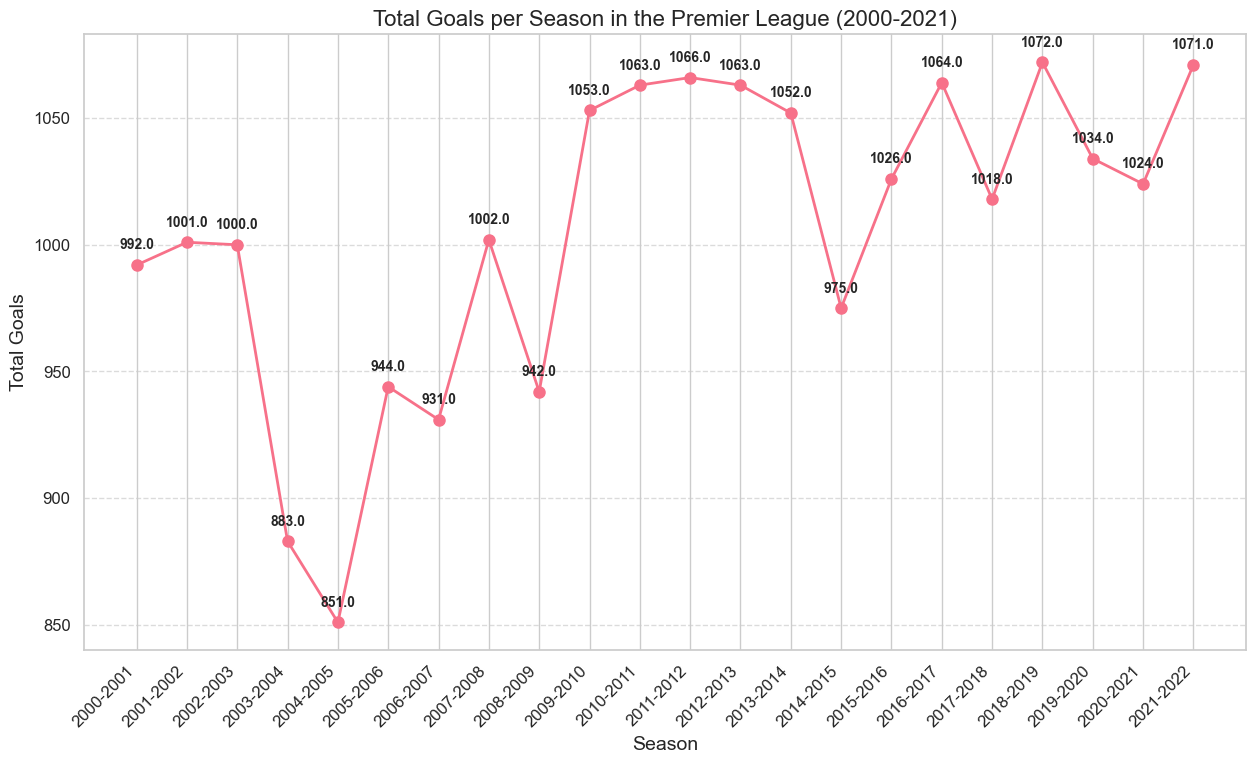

In [11]:
# 5.各赛季的总进球数
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 2)

# 读取 total_with_rank.csv 文件
data = pd.read_csv('Premier_League_data/total_with_rank.csv')

# 移除22-23赛季的数据
data = data[data['Season'] != '2022-2023']

# 计算每个赛季的总进球数
goals_per_season = data.groupby('Season')['Goals'].sum()

# 可视化结果
plt.figure(figsize=(15, 8))
plt.plot(goals_per_season.index, goals_per_season.values, linestyle='-', marker='o', linewidth=2, markersize=8)

# 添加数据标签
for season, goals in zip(goals_per_season.index, goals_per_season.values):
    plt.text(season, goals + 5, goals, ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Total Goals per Season in the Premier League (2000-2021)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Goals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.show()


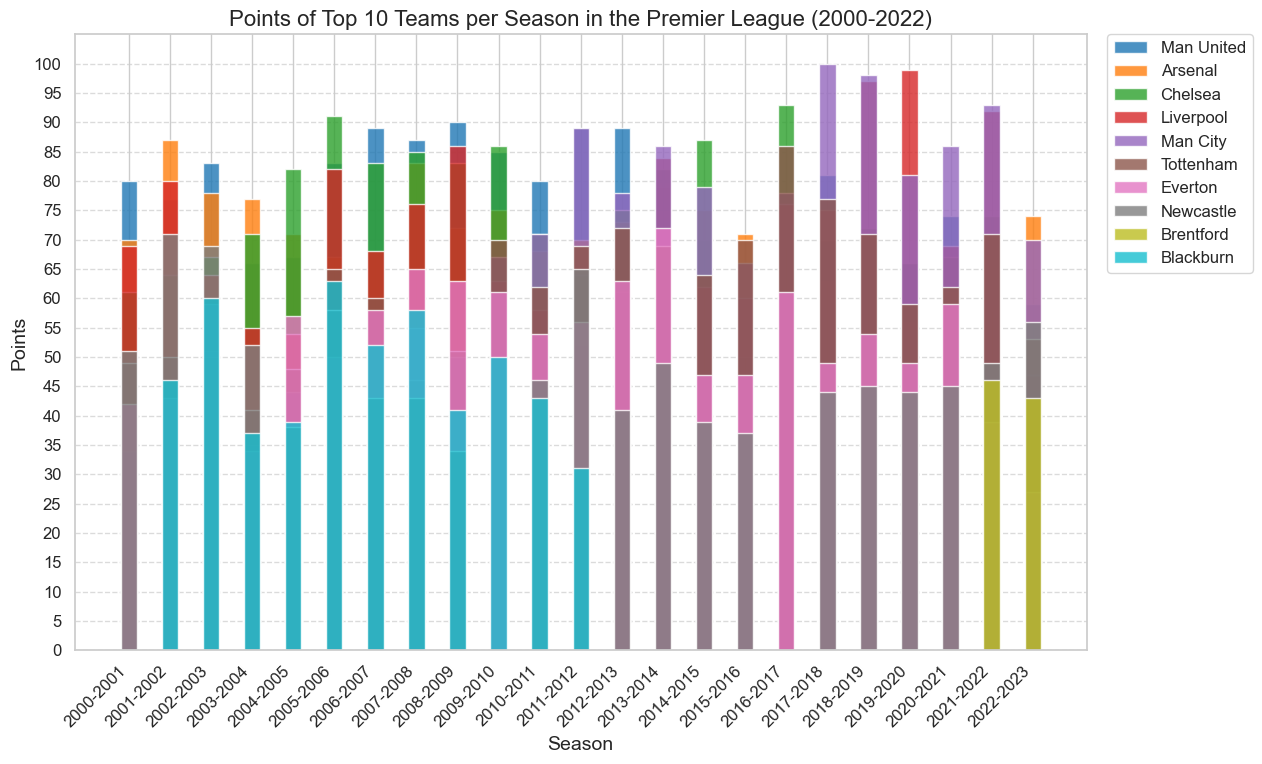

In [12]:
# 6.排名前十的球队在不同赛季的积分表现
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 10)

# 读取 total_with_rank.csv 文件
data = pd.read_csv('Premier_League_data/total_with_rank.csv')

# 选择排名前十的球队
top_10_teams = data.groupby('Team').agg({'Rank': 'mean'}).sort_values(by='Rank').head(10).index

# 计算每个赛季排名前十的球队的积分
top_10_points_per_season = data[data['Team'].isin(top_10_teams)].groupby(['Season', 'Team']).agg({'Points': 'sum'}).reset_index()

# 绘制条形图
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_prop_cycle('color', plt.cm.tab10.colors)
width = 0.4

for i, team in enumerate(top_10_teams):
    team_data = top_10_points_per_season[top_10_points_per_season['Team'] == team]
    ax.bar(team_data['Season'], team_data['Points'], label=team, width=width, align='center', alpha=0.8, zorder=2)

ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=12)
ax.set_title('Points of Top 10 Teams per Season in the Premier League (2000-2022)', fontsize=16)
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('Points', fontsize=14)
ax.set_xticks(top_10_points_per_season['Season'].unique())
ax.set_xticklabels(top_10_points_per_season['Season'].unique(), rotation=45, ha='right', fontsize=12)
ax.set_yticks(range(0, 105, 5))
ax.set_yticklabels(range(0, 105, 5), fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.subplots_adjust(right=0.8)
plt.show()

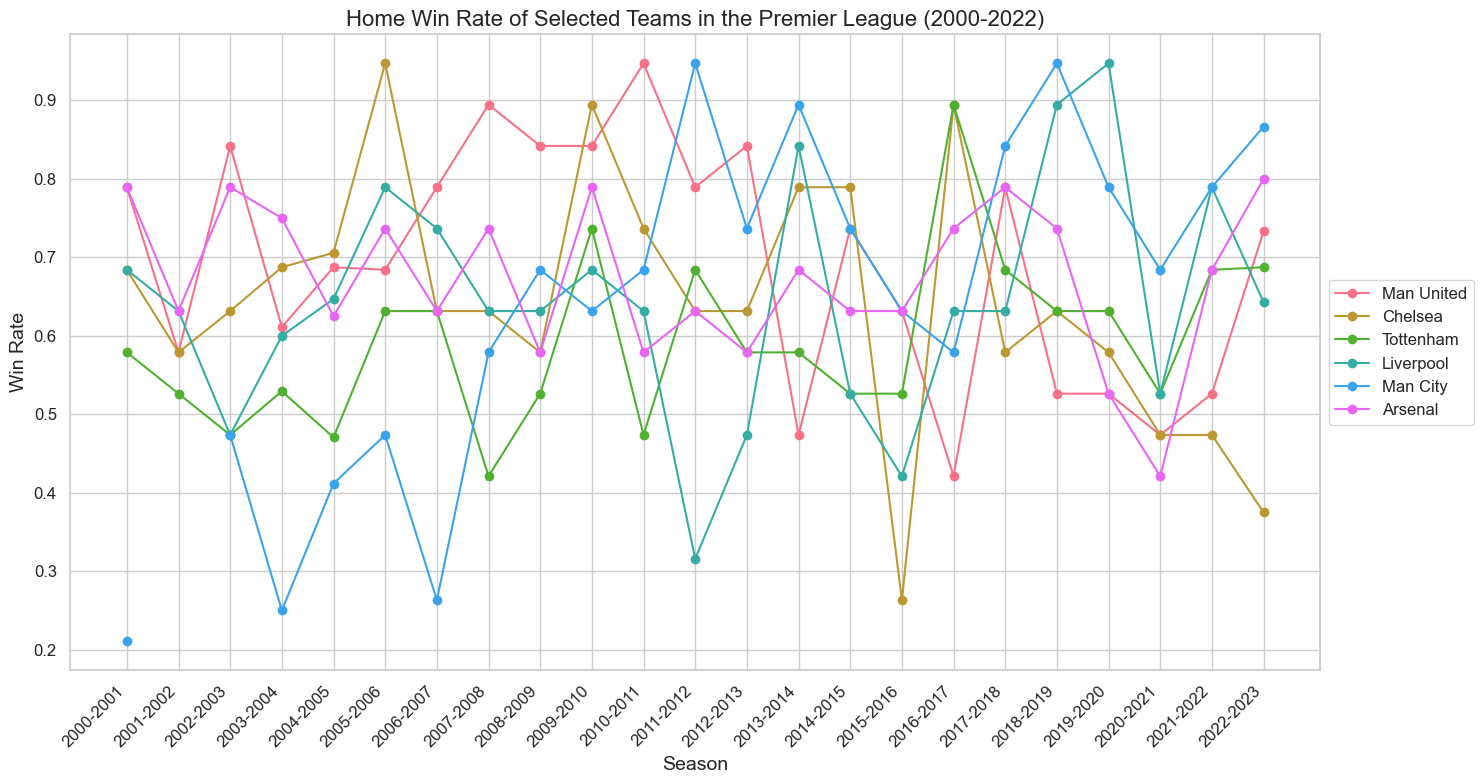

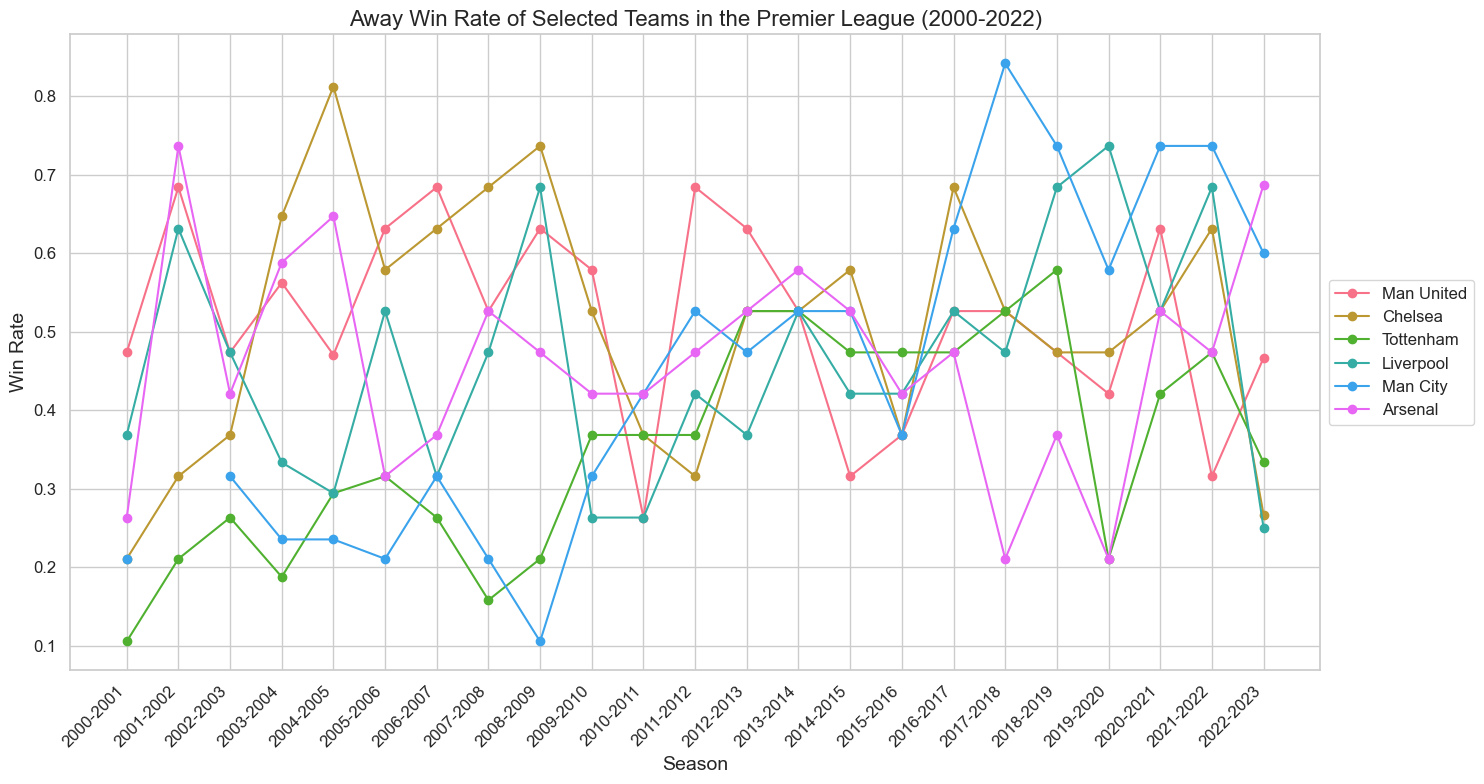

In [13]:
# 7.英超big6的各赛季主客场胜率
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 6)

# 读取 total_with_rank.csv 文件
data = pd.read_csv('Premier_League_data/total_with_rank.csv')

# 选择需要分析的球队
teams = ['Man United', 'Chelsea', 'Tottenham', 'Liverpool', 'Man City', 'Arsenal']

# 计算每个球队在主场的胜率
home_win_rate = data[data['Team'].isin(teams)].groupby(['Season', 'Team']).agg({'HomeWins': 'sum', 'HomeDraws': 'sum', 'HomeLosses': 'sum'}).apply(lambda x: x / x.sum(), axis=1)
home_win_rate = home_win_rate['HomeWins'].unstack()

# 绘制折线图
plt.figure(figsize=(15, 8))
for team in teams:
    plt.plot(home_win_rate.index, home_win_rate[team], label=team, marker='o')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Home Win Rate of Selected Teams in the Premier League (2000-2022)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 计算每个球队在客场的胜率
away_win_rate = data[data['Team'].isin(teams)].groupby(['Season', 'Team']).agg({'AwayWins': 'sum', 'AwayDraws': 'sum', 'AwayLosses': 'sum'}).apply(lambda x: x / x.sum(), axis=1)
away_win_rate = away_win_rate['AwayWins'].unstack()

# 绘制折线图
plt.figure(figsize=(15, 8))
for team in teams:
    plt.plot(away_win_rate.index, away_win_rate[team], label=team, marker='o')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Away Win Rate of Selected Teams in the Premier League (2000-2022)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

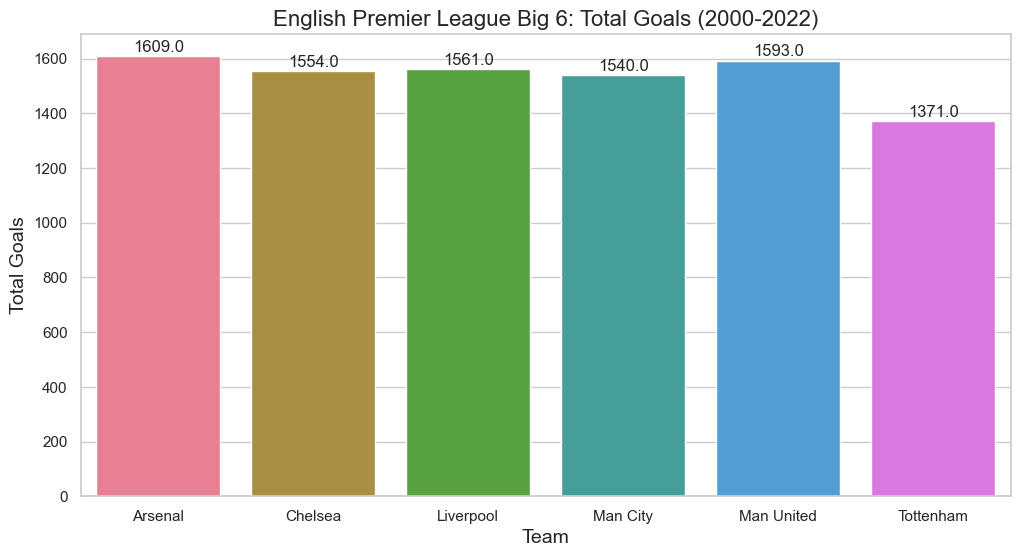

In [14]:
# 8.英超big6总进球数
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 6)

df = pd.read_csv("Premier_League_data/total_with_rank.csv")

big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

total_goals = big_6_df.groupby("Team")["Goals"].sum()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=total_goals.index, y=total_goals.values)
plt.xlabel("Team", fontsize=14)
plt.ylabel("Total Goals", fontsize=14)
plt.title("English Premier League Big 6: Total Goals (2000-2022)", fontsize=16)

for i, value in enumerate(total_goals.values):
    plt.text(i, value + 5, f"{value}", ha='center', va='bottom', fontsize=12)

plt.show()

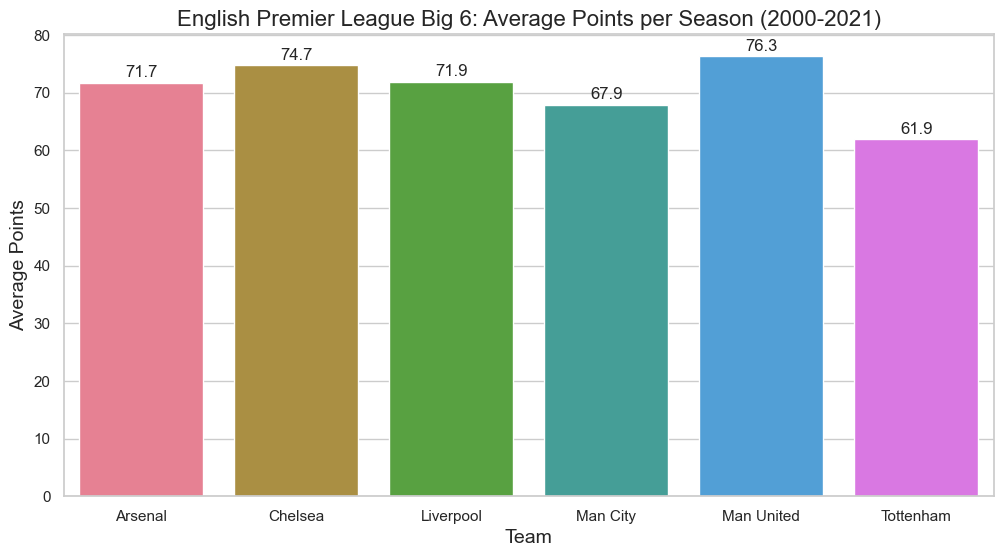

In [15]:
# 9.英超big6赛季平均分
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 6)

df = pd.read_csv("Premier_League_data/total_with_rank.csv")

# 仅包含 2000-2021 赛季的数据
df = df[df['Season'] != '2022-2023']

big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

total_points = big_6_df.groupby("Team")["Points"].sum()
season_count = big_6_df.groupby("Team")["Season"].count()
average_points = total_points / season_count

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_points.index, y=average_points.values)
plt.xlabel("Team", fontsize=14)
plt.ylabel("Average Points", fontsize=14)
plt.title("English Premier League Big 6: Average Points per Season (2000-2021)", fontsize=16)

for i, value in enumerate(average_points.values):
    plt.text(i, value + 0.5, f"{round(value, 1)}", ha='center', va='bottom', fontsize=12)

plt.show()

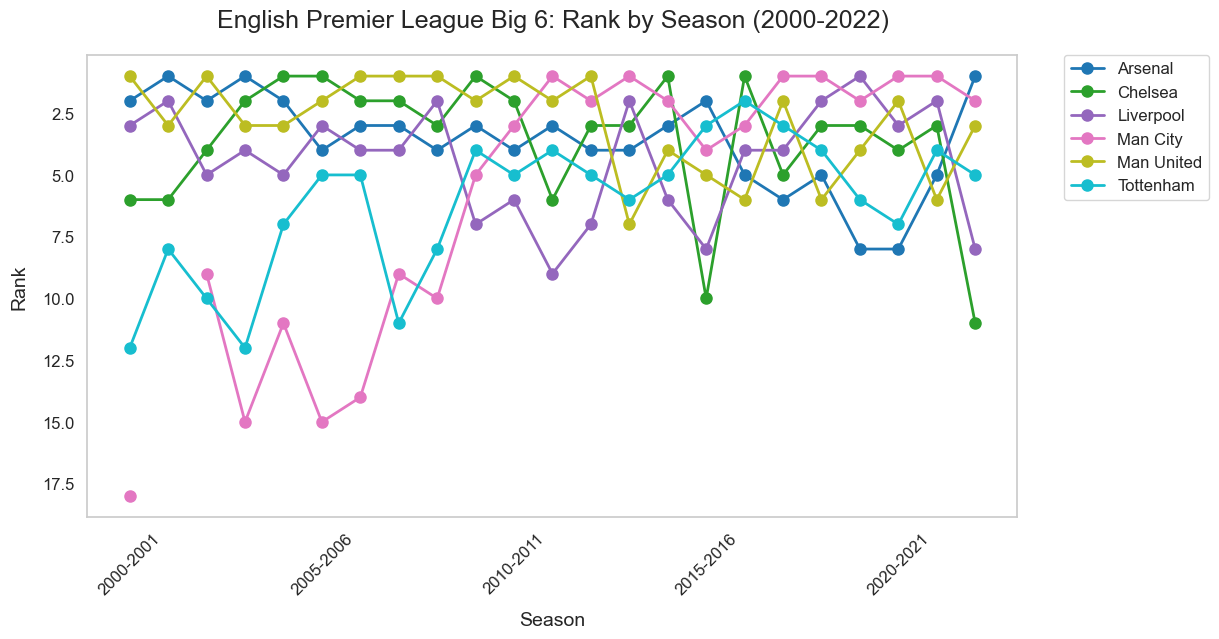

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

df = pd.read_csv("Premier_League_data/total_with_rank.csv")

big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

pivot_df = big_6_df.pivot_table(index="Season", columns="Team", values="Rank")

plt.figure(figsize=(12, 6))
ax = pivot_df.plot(lw=2, marker='o', markersize=8, figsize=(12, 6), colormap='tab10', ax=plt.gca())

# Invert y-axis and set labels
ax.invert_yaxis()
ax.set_xlabel("Season", fontsize=14, labelpad=10)
ax.set_ylabel("Rank", fontsize=14, labelpad=10)
ax.set_title("English Premier League Big 6: Rank by Season (2000-2022)", fontsize=18, pad=20)

# Customize legend and ticks
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.grid()
plt.show()


/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_34442/592950296.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_6_df["WinRate"] = big_6_df["Wins"] / (big_6_df["Wins"] + big_6_df["Draws"] + big_6_df["Losses"])


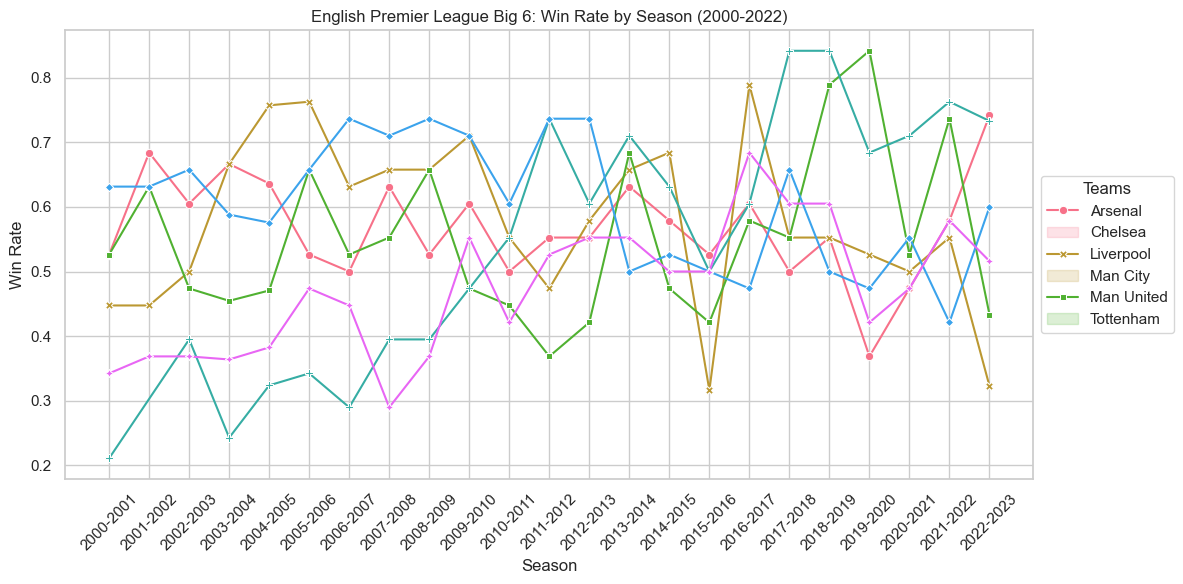

In [18]:
# 11.赛季胜率折线图优化：
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 6)

df = pd.read_csv("Premier_League_data/total_with_rank.csv")
big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

big_6_df["WinRate"] = big_6_df["Wins"] / (big_6_df["Wins"] + big_6_df["Draws"] + big_6_df["Losses"])

pivot_df = big_6_df.pivot_table(index="Season", columns="Team", values="WinRate")

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=pivot_df, markers=True, dashes=False)

ax.set(xlabel="Season", ylabel="Win Rate",
       title="English Premier League Big 6: Win Rate by Season (2000-2022)")

ax.legend(pivot_df.columns, loc="center left", title="Teams", bbox_to_anchor=(1.0, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

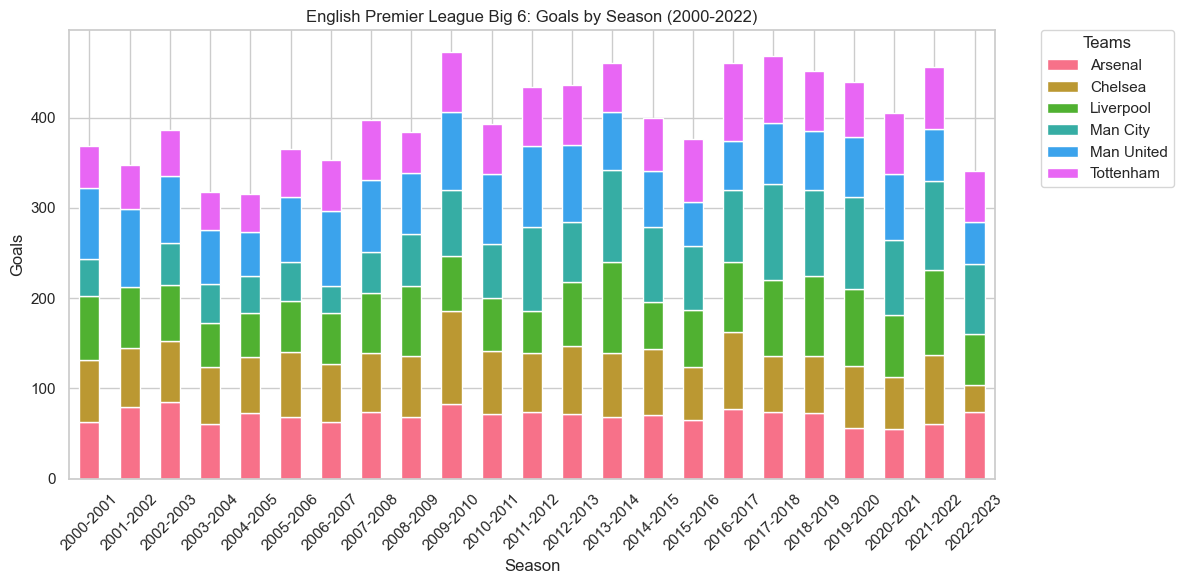

In [19]:
# 12.各队历年进球数堆积柱状图优化：
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 6)

df = pd.read_csv("Premier_League_data/total_with_rank.csv")
big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

pivot_df = big_6_df.pivot_table(index="Season", columns="Team", values="Goals")

fig, ax = plt.subplots(figsize=(12, 6))

pivot_df.plot(kind="bar", stacked=True, ax=ax)

ax.set(xlabel="Season", ylabel="Goals",
       title="English Premier League Big 6: Goals by Season (2000-2022)")
       
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Teams", borderaxespad=0)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

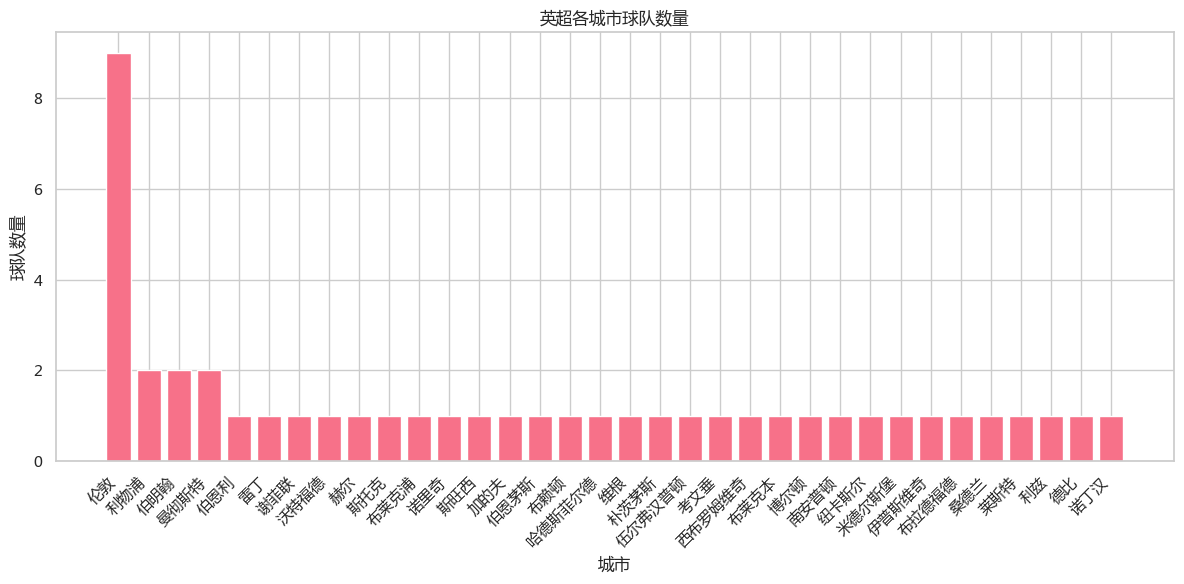

In [20]:
# 13.各城市的参赛球队
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 城市-球队对应关系
team_city = {
    'Charlton': '伦敦',
    'Chelsea': '伦敦',
    'Coventry': '考文垂',
    'Derby': '德比',
    'Leeds': '利兹',
    'Leicester': '莱斯特',
    'Liverpool': '利物浦',
    'Sunderland': '桑德兰',
    'Tottenham': '伦敦',
    'Man United': '曼彻斯特',
    'Arsenal': '伦敦',
    'Bradford': '布拉德福德',
    'Ipswich': '伊普斯维奇',
    'Middlesbrough': '米德尔斯堡',
    'Everton': '利物浦',
    'Man City': '曼彻斯特',
    'Newcastle': '纽卡斯尔',
    'Southampton': '南安普顿',
    'West Ham': '伦敦',
    'Aston Villa': '伯明翰',
    'Bolton': '博尔顿',
    'Blackburn': '布莱克本',
    'Fulham': '伦敦',
    'Birmingham': '伯明翰',
    'West Brom': '西布罗姆维奇',
    'Portsmouth': '朴茨茅斯',
    'Wolves': '伍尔弗汉普顿',
    'Norwich': '诺里奇',
    'Crystal Palace': '伦敦',
    'Wigan': '维根',
    'Reading': '雷丁',
    'Sheffield United': '谢菲联',
    'Watford': '沃特福德',
    'Hull': '赫尔',
    'Stoke': '斯托克',
    'Burnley': '伯恩利',
    'Blackpool': '布莱克浦',
    'QPR': '伦敦',
    'Swansea': '斯旺西',
    'Cardiff': '加的夫',
    'Bournemouth': '伯恩茅斯',
    'Brighton': '布赖顿',
    'Huddersfield': '哈德斯菲尔德',
    'Brentford': '伦敦',
    "Nott'm Forest": '诺丁汉'
}

# 计算每个城市的球队数量
city_counts = pd.Series(list(team_city.values())).value_counts()

# 可视化结果
plt.figure(figsize=(12, 6))
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('城市')
plt.ylabel('球队数量')
plt.title('英超各城市球队数量')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


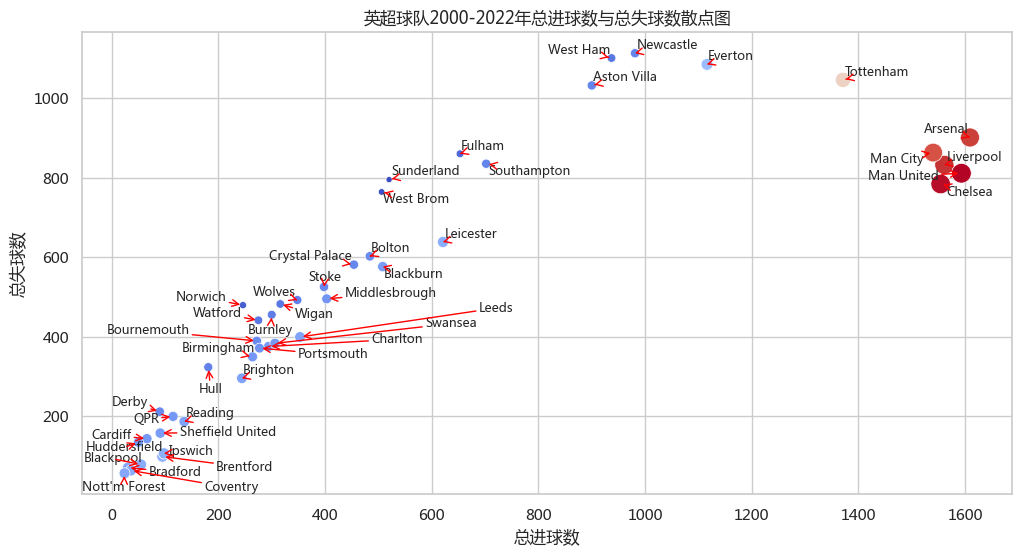

In [22]:
# 14.进球与失球散点图
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv("Premier_League_data/total_with_rank.csv")
team_total_goals = df.groupby("Team")["Goals"].sum()
team_total_conceded = df.groupby("Team")["Conceded"].sum()

team_data = pd.DataFrame({"Total Goals": team_total_goals, "Total Conceded": team_total_conceded})
team_data["Goal Difference"] = team_data["Total Goals"] - team_data["Total Conceded"]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=team_data, x="Total Goals", y="Total Conceded", hue="Goal Difference", size="Goal Difference", sizes=(20, 200), palette="coolwarm", legend=False)

texts = []
for i, row in team_data.iterrows():
    texts.append(plt.text(row["Total Goals"], row["Total Conceded"], i, fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel("总进球数")
plt.ylabel("总失球数")
plt.title("英超球队2000-2022年总进球数与总失球数散点图")
plt.show()


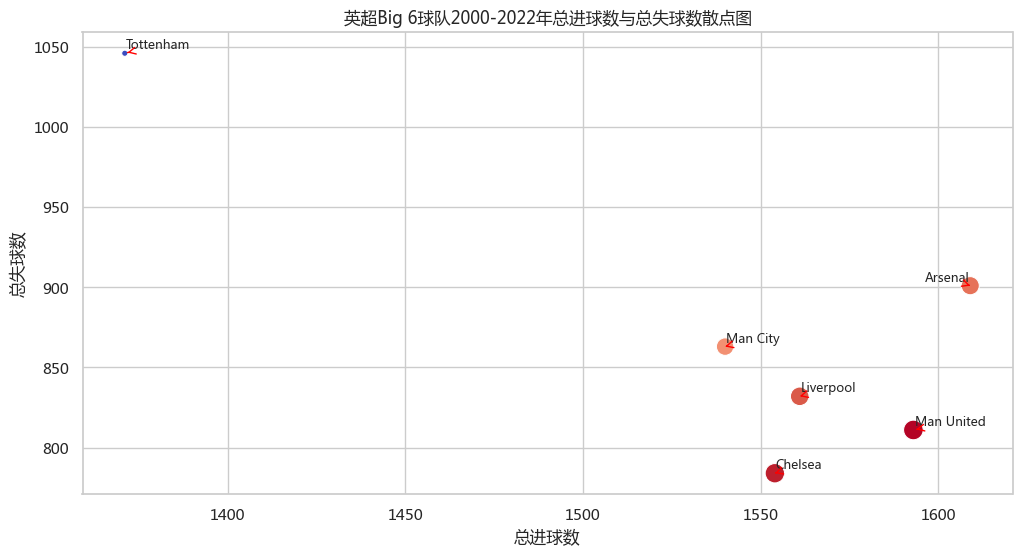

In [23]:
# 15.总进球数与总失球数散点图
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv("Premier_League_data/total_with_rank.csv")

big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

team_total_goals = big_6_df.groupby("Team")["Goals"].sum()
team_total_conceded = big_6_df.groupby("Team")["Conceded"].sum()

team_data = pd.DataFrame({"Total Goals": team_total_goals, "Total Conceded": team_total_conceded})
team_data["Goal Difference"] = team_data["Total Goals"] - team_data["Total Conceded"]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=team_data, x="Total Goals", y="Total Conceded", hue="Goal Difference", size="Goal Difference", sizes=(20, 200), palette="coolwarm", legend=False)

texts = []
for i, row in team_data.iterrows():
    texts.append(plt.text(row["Total Goals"], row["Total Conceded"], i, fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel("总进球数")
plt.ylabel("总失球数")
plt.title("英超Big 6球队2000-2022年总进球数与总失球数散点图")
plt.show()


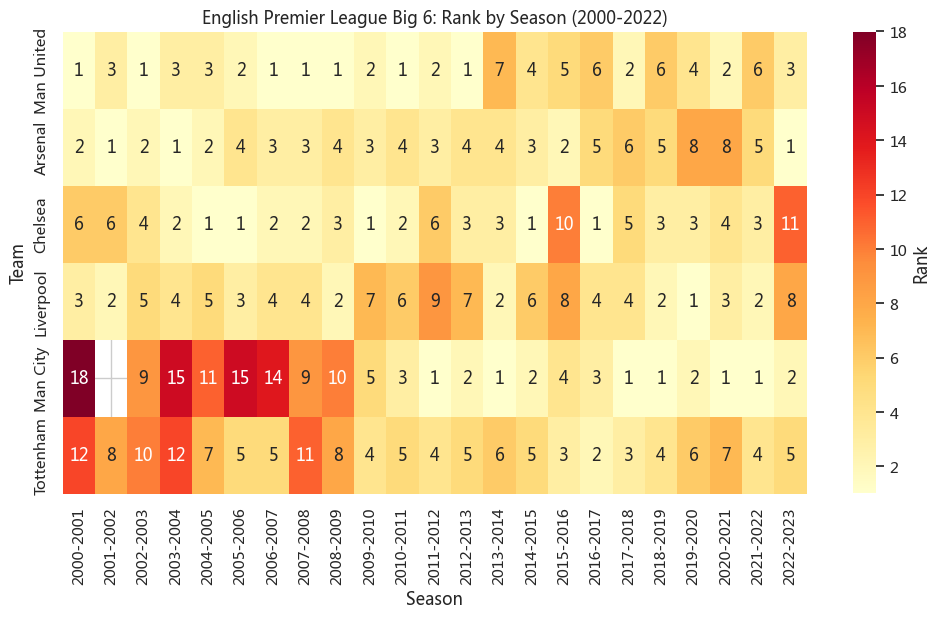

In [24]:
# 16.热力图来表示英超Big 6球队在2000-2022年期间的排名状况
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Premier_League_data/total_with_rank.csv")

big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

# 将数据转换为热力图所需的格式
heatmap_df = big_6_df.pivot_table(index="Team", columns="Season", values="Rank")
heatmap_df = heatmap_df.reindex(big_6)  # 按预期顺序排列球队

# 绘制热力图
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="YlOrRd", cbar_kws={'label': 'Rank'})
plt.xlabel("Season")
plt.ylabel("Team")
plt.title("English Premier League Big 6: Rank by Season (2000-2022)")
plt.show()


/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_34442/4217664980.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_6_df.loc[:, "GoalDifference"] = big_6_df["Goals"] - big_6_df["Conceded"]


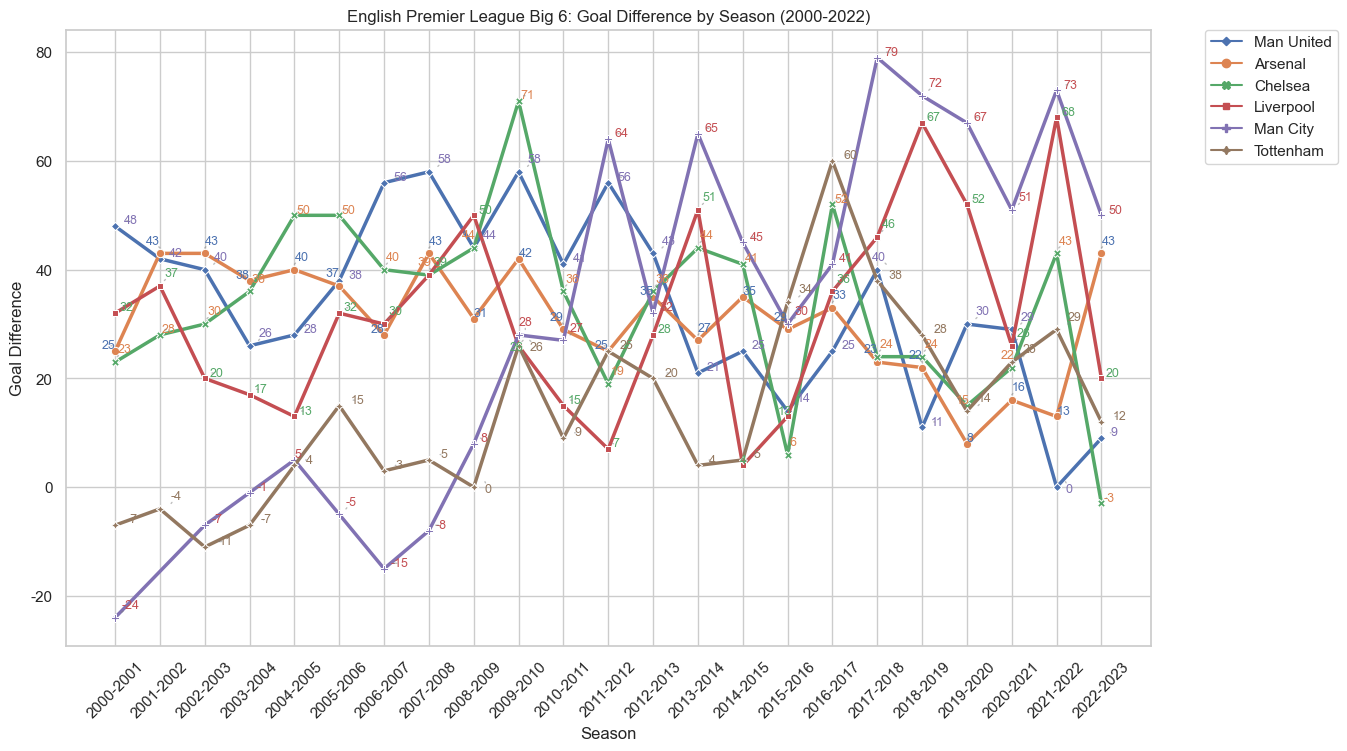

In [43]:
# 17.净胜球变化
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from adjustText import adjust_text

df = pd.read_csv("Premier_League_data/total_with_rank.csv")

big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

big_6_df.loc[:, "GoalDifference"] = big_6_df["Goals"] - big_6_df["Conceded"]
pivot_df = big_6_df.pivot_table(index="Season", columns="Team", values="GoalDifference")

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_palette("deep")

ax = sns.lineplot(data=pivot_df, markers=True, dashes=False, linewidth=2.5, hue_order=big_6)

# 添加数据标签
texts = []
for idx, col in enumerate(pivot_df.columns):
    color = sns.color_palette("deep")[idx]
    for x, y in enumerate(pivot_df[col]):
        if not np.isnan(y):
            text = ax.text(x + idx * 0.05, y + 1, str(int(y)), color=color, fontsize=9, ha='center')
            texts.append(text)

# 调整数据标签的位置
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5), autoalign='x', force_text=0.05, only_move={'points':'y', 'text':'y'})

plt.xlabel("Season")
plt.ylabel("Goal Difference")
plt.title("English Premier League Big 6: Goal Difference by Season (2000-2022)")
plt.legend(ax.get_legend_handles_labels()[0], big_6, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()


In [42]:
man_city_df = big_6_df[big_6_df["Team"] == "Man City"]
man_city_goal_difference = man_city_df[["Season", "GoalDifference"]]
print(man_city_goal_difference)


        Season  GoalDifference
17   2000-2001           -24.0
48   2002-2003            -7.0
74   2003-2004            -1.0
90   2004-2005             5.0
114  2005-2006            -5.0
133  2006-2007           -15.0
148  2007-2008            -8.0
169  2008-2009             8.0
184  2009-2010            28.0
202  2010-2011            27.0
220  2011-2012            64.0
241  2012-2013            32.0
260  2013-2014            65.0
281  2014-2015            45.0
303  2015-2016            30.0
322  2016-2017            41.0
340  2017-2018            79.0
360  2018-2019            72.0
381  2019-2020            67.0
400  2020-2021            51.0
420  2021-2022            73.0
441  2022-2023            50.0


In [2]:
pip install mplcursors

Note: you may need to restart the kernel to use updated packages.


In [14]:
%matplotlib notebook

In [12]:
%matplotlib inline

/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_36001/3666168339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_6_df["HomeWinRate"] = big_6_df["HomeWins"] / (big_6_df["HomeWins"] + big_6_df["HomeDraws"] + big_6_df["HomeLosses"])
/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_36001/3666168339.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_6_df["AwayWinRate"] = big_6_df["AwayWins"] / (big_6_df["AwayWins"] + big_6_df["AwayDraws"] + big_6_df["AwayLosses"])
/var/folders

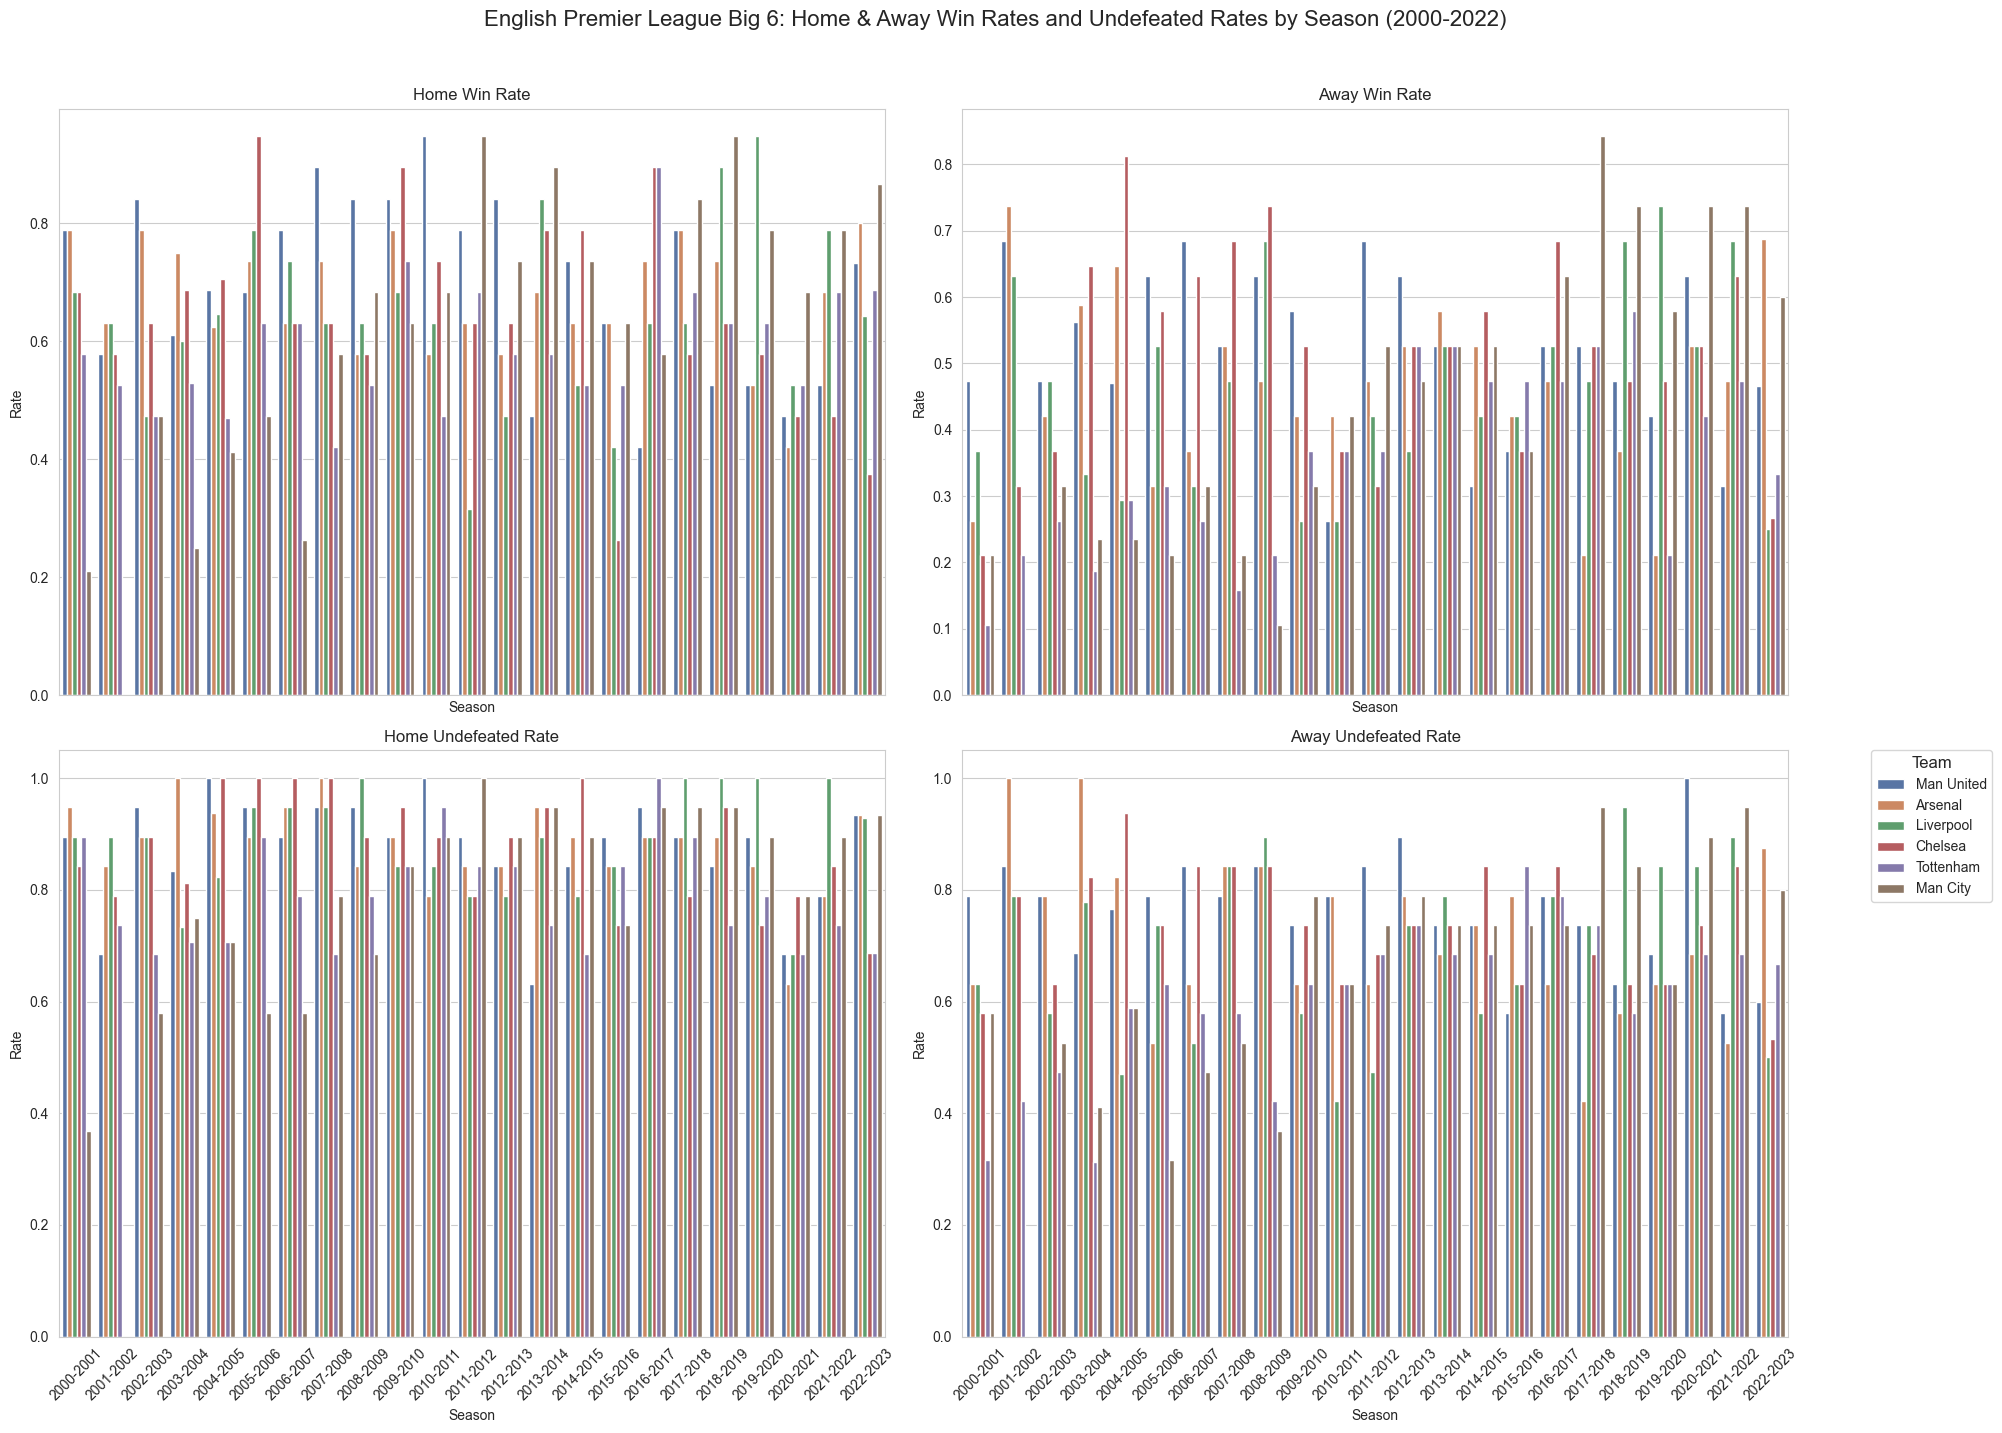

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Premier_League_data/total_with_rank.csv")

big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

big_6_df["HomeWinRate"] = big_6_df["HomeWins"] / (big_6_df["HomeWins"] + big_6_df["HomeDraws"] + big_6_df["HomeLosses"])
big_6_df["AwayWinRate"] = big_6_df["AwayWins"] / (big_6_df["AwayWins"] + big_6_df["AwayDraws"] + big_6_df["AwayLosses"])
big_6_df["HomeUndefeatedRate"] = (big_6_df["HomeWins"] + big_6_df["HomeDraws"]) / (big_6_df["HomeWins"] + big_6_df["HomeDraws"] + big_6_df["HomeLosses"])
big_6_df["AwayUndefeatedRate"] = (big_6_df["AwayWins"] + big_6_df["AwayDraws"]) / (big_6_df["AwayWins"] + big_6_df["AwayDraws"] + big_6_df["AwayLosses"])

big_6_df = big_6_df[["Season", "Team", "HomeWinRate", "AwayWinRate", "HomeUndefeatedRate", "AwayUndefeatedRate"]]

melted_df = big_6_df.melt(id_vars=["Season", "Team"], var_name="HomeAway", value_name="Rate")
melted_df["HomeAway"] = melted_df["HomeAway"].replace({"HomeWinRate": "Home Win Rate", "AwayWinRate": "Away Win Rate", "HomeUndefeatedRate": "Home Undefeated Rate", "AwayUndefeatedRate": "Away Undefeated Rate"})

fig, axes = plt.subplots(2, 2, figsize=(20, 14), sharex=True)
sns.set_style("whitegrid")
sns.set_palette("deep")

categories = ["Home Win Rate", "Away Win Rate", "Home Undefeated Rate", "Away Undefeated Rate"]

for i, ax in enumerate(axes.flatten()):
    sns.barplot(data=melted_df[melted_df["HomeAway"] == categories[i]], x="Season", y="Rate", hue="Team", ci=None, estimator=sum, ax=ax)
    ax.set_title(categories[i])
    ax.set_xlabel("Season")
    ax.set_ylabel("Rate")
    ax.legend().set_visible(False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.suptitle("English Premier League Big 6: Home & Away Win Rates and Undefeated Rates by Season (2000-2022)", fontsize=16, y=1.02)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0, title="Team", title_fontsize=12)

plt.tight_layout()
plt.show()


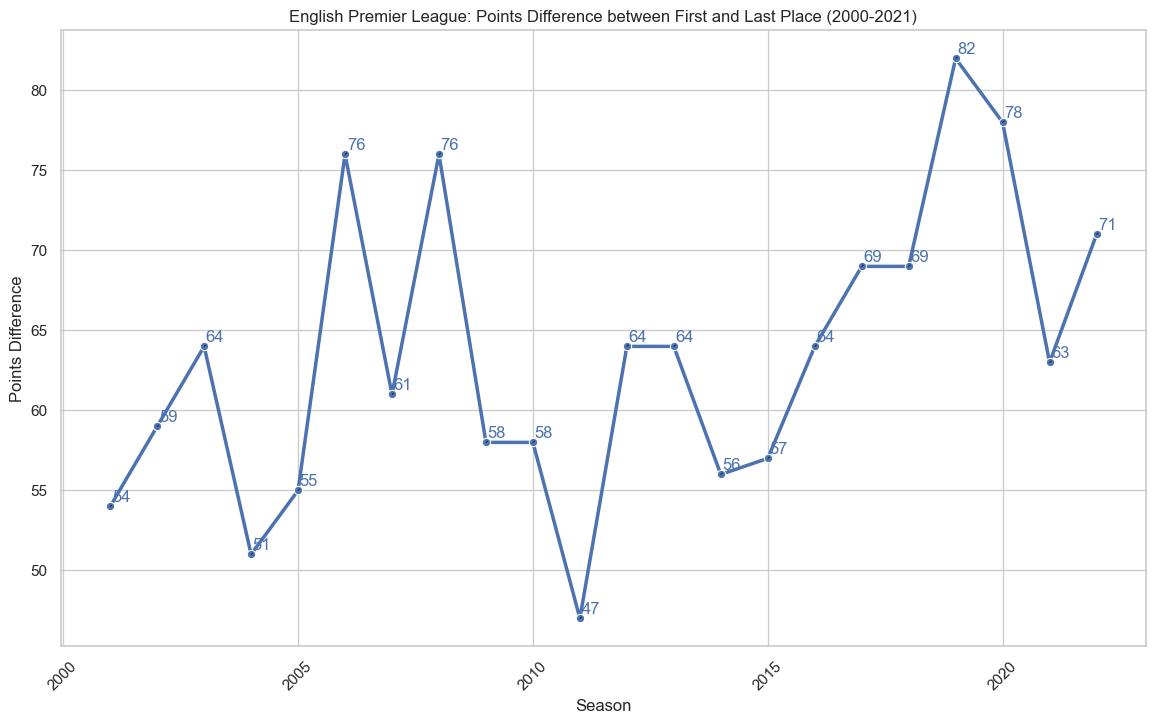

In [27]:
# 18.榜首榜末分差
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv("Premier_League_data/total_with_rank.csv")

# 获取每个赛季的榜首和榜末球队
first_place = df[df["Rank"] == 1]
last_place = df[df["Rank"] == 20]

# 计算每个赛季榜首与榜末球队之间的分差
point_difference = first_place[["Season", "Points"]].reset_index(drop=True)
point_difference["PointsDifference"] = first_place["Points"].values - last_place["Points"].values

# 移除22-23赛季数据
point_difference = point_difference[:-1]

# 将赛季字符串转换为数值
point_difference["Season"] = point_difference["Season"].apply(lambda x: int(x[:2] + x[-2:]))

# 设置图表样式
sns.set_style("whitegrid")
sns.set_palette("deep")

# 设置字体大小
plt.rcParams.update({'font.size': 12})

# 创建图像
plt.figure(figsize=(14, 8))

# 绘制折线图
ax = sns.lineplot(x="Season", y="PointsDifference", data=point_difference, marker='o', linewidth=2.5, linestyle='-', color="b")

# 添加数据标签
texts = []
for x, y in zip(point_difference["Season"], point_difference["PointsDifference"]):
    texts.append(ax.text(x, y, str(y), color="b", ha='center'))

# 调整数据标签位置
adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1.2, 1.2), expand_text=(1, 1), arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

# 添加标题和轴标签
plt.xlabel("Season")
plt.ylabel("Points Difference")
plt.title("English Premier League: Points Difference between First and Last Place (2000-2021)")

# 旋转x轴标签
plt.xticks(rotation=45)

# 添加网格线
plt.grid(True)

# 显示图像
plt.show()


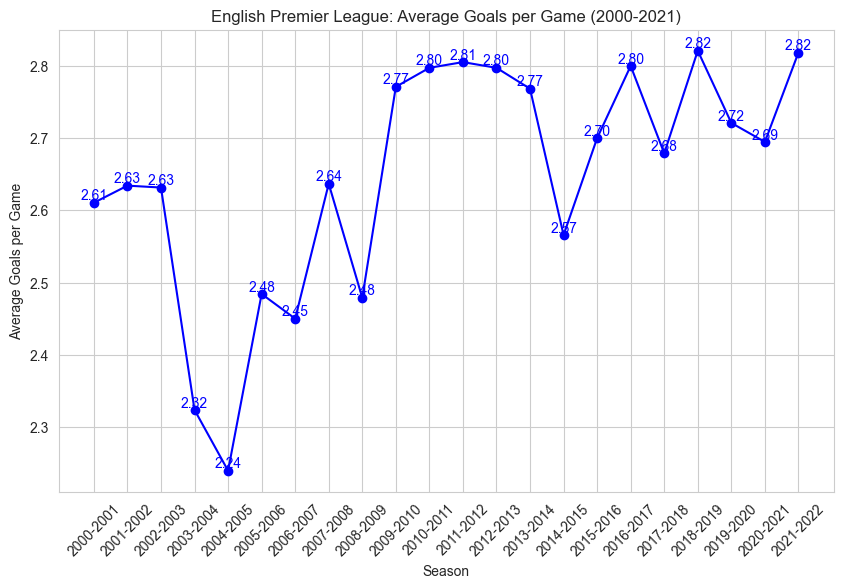

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Premier_League_data/total_with_rank.csv")
df = df[df['Season'] != '2022-2023']
average_goals = df.groupby("Season")["Goals"].sum() / 380

plt.figure(figsize=(10, 6))
plt.plot(average_goals.index, average_goals.values, marker='o', linestyle='-', color="b")

for i, v in enumerate(average_goals.values):
    plt.text(i, v, f"{v:.2f}", color='blue', ha='center', va='bottom', fontsize=10)

plt.xlabel("Season")
plt.ylabel("Average Goals per Game")
plt.title("English Premier League: Average Goals per Game (2000-2021)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


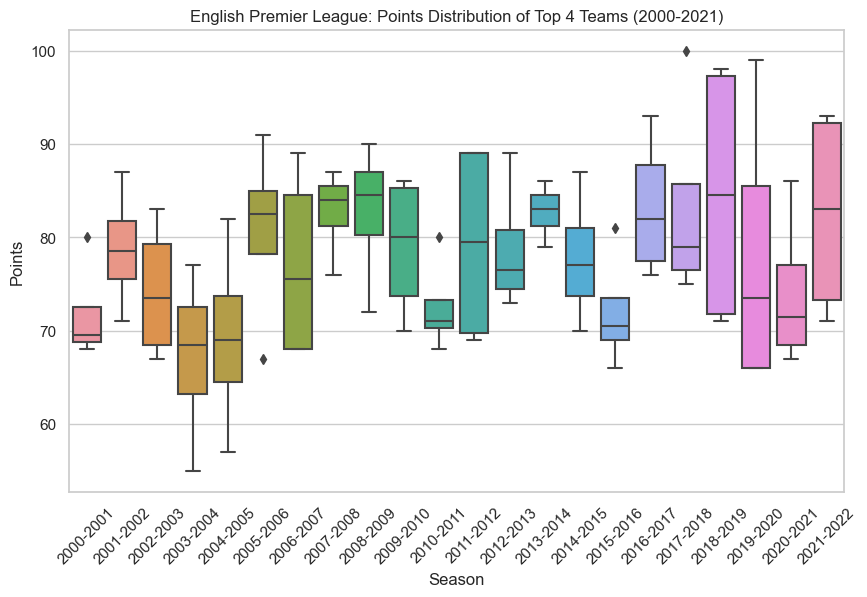

In [29]:
# 20.每个赛季前四名球队的积分分布
import pandas as pd
import seaborn as sns

df = pd.read_csv("Premier_League_data/total_with_rank.csv")
df = df[df['Season'] != '2022-2023']
top_four = df[df["Rank"].isin([1, 2, 3, 4])]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(x="Season", y="Points", data=top_four)
plt.xlabel("Season")
plt.ylabel("Points")
plt.title("English Premier League: Points Distribution of Top 4 Teams (2000-2021)")
plt.xticks(rotation=45)
plt.show()

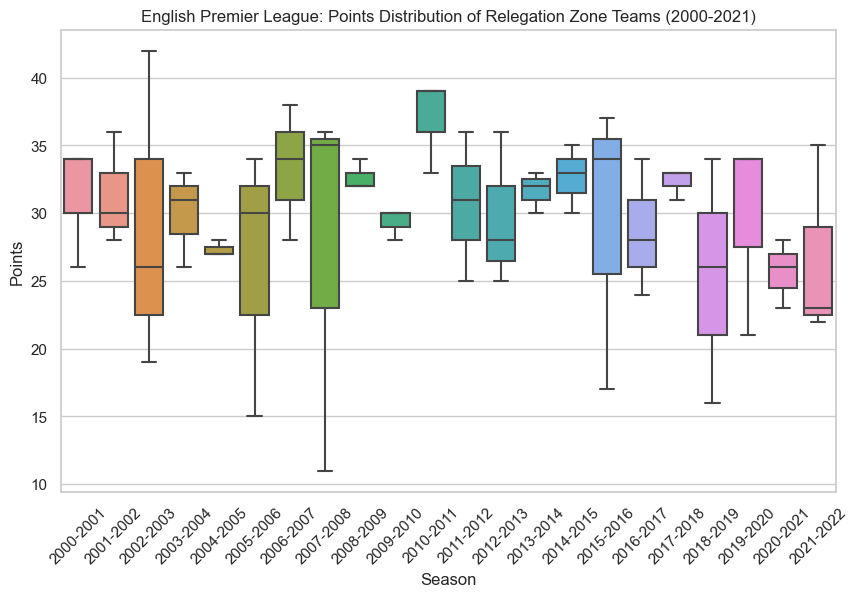

In [30]:
# 21.每个赛季降级区球队的积分分布
import pandas as pd
import seaborn as sns

df = pd.read_csv("Premier_League_data/total_with_rank.csv")
df = df[df['Season'] != '2022-2023']
relegation_zone = df[df["Rank"].isin([18, 19, 20])]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(x="Season", y="Points", data=relegation_zone)
plt.xlabel("Season")
plt.ylabel("Points")
plt.title("English Premier League: Points Distribution of Relegation Zone Teams (2000-2021)")
plt.xticks(rotation=45)
plt.show()

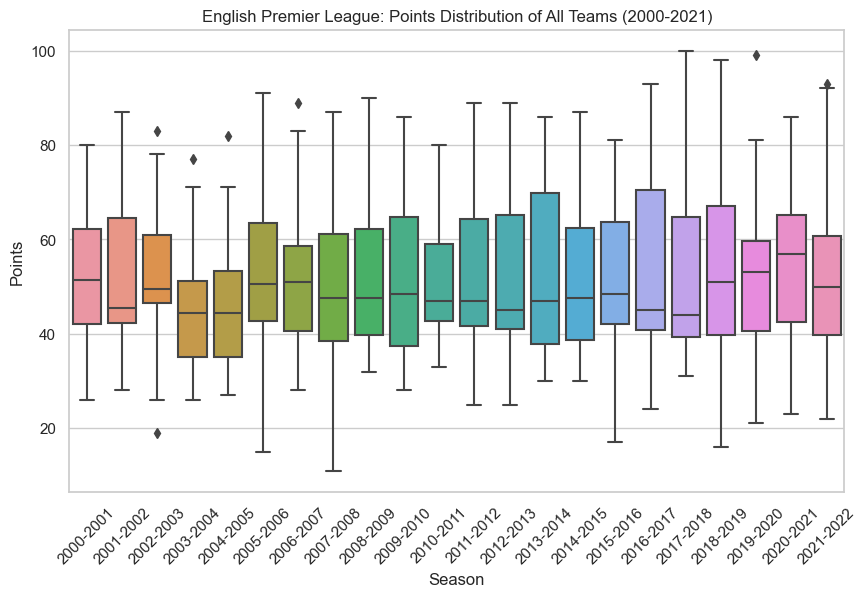

In [31]:
# 22.每个赛季球队积分的箱线图表示
import pandas as pd
import seaborn as sns

df = pd.read_csv("Premier_League_data/total_with_rank.csv")
df = df[df['Season'] != '2022-2023']

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(x="Season", y="Points", data=df)
plt.xlabel("Season")
plt.ylabel("Points")
plt.title("English Premier League: Points Distribution of All Teams (2000-2021)")
plt.xticks(rotation=45)
plt.show()

/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_34442/1217801640.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_cards = df.groupby("Season")["YellowCards", "RedCards"].sum() / 380


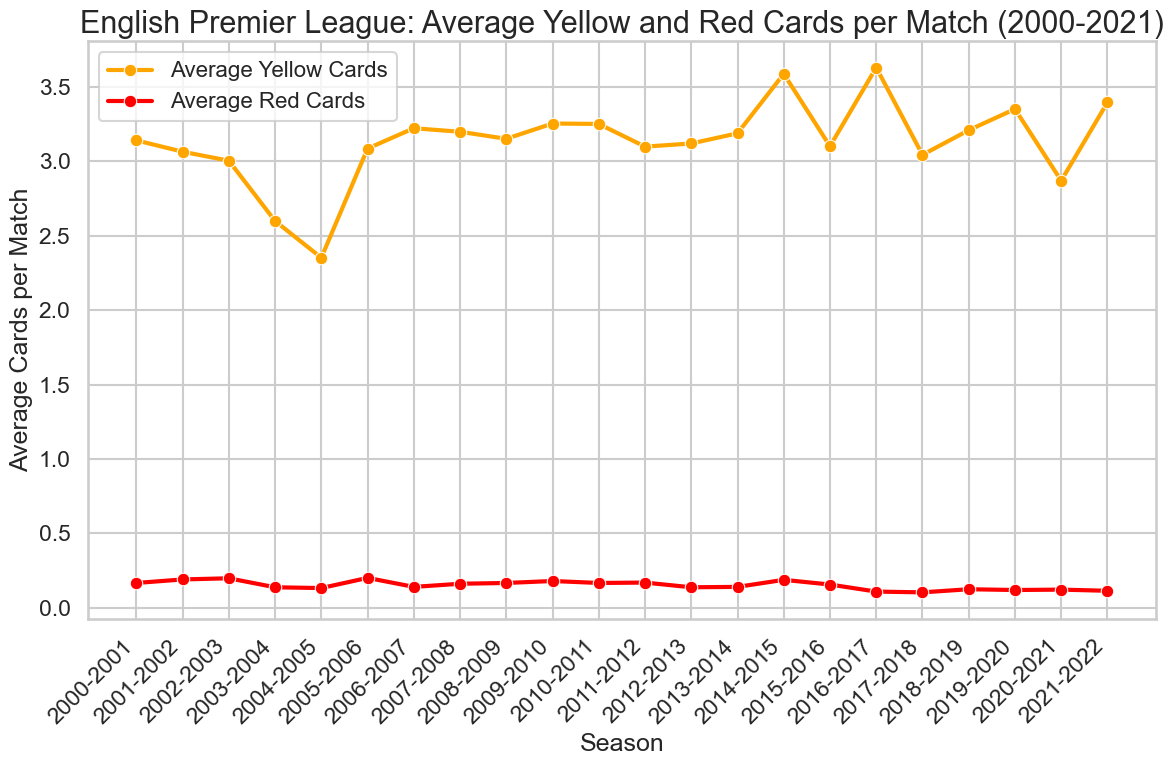

In [32]:
# 23.每个赛季平均每场比赛的红黄牌数量
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv("Premier_League_data/total_with_rank.csv")
df = df[df["Season"] != "2022-2023"]

# 计算每个赛季的平均红黄牌数量
average_cards = df.groupby("Season")["YellowCards", "RedCards"].sum() / 380
average_cards = average_cards.reset_index()

# 设置图表样式
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.set_context("talk")

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制折线图
sns.lineplot(x="Season", y="YellowCards", data=average_cards, marker='o', linewidth=3, linestyle='-', label="Average Yellow Cards", color="orange")
sns.lineplot(x="Season", y="RedCards", data=average_cards, marker='o', linewidth=3, linestyle='-', label="Average Red Cards", color="red")

# 添加标题和轴标签
ax.set_xlabel("Season", fontsize=18)
ax.set_ylabel("Average Cards per Match", fontsize=18)
ax.set_title("English Premier League: Average Yellow and Red Cards per Match (2000-2021)", fontsize=22)

# 旋转x轴标签
plt.xticks(rotation=45, ha="right")

# 添加图例
ax.legend(fontsize=16)

# 添加网格线
ax.grid(True)

# 调整图像边缘
plt.tight_layout()

# 显示图像
plt.show()



/var/folders/qp/w4l86_z57cg81831df6lkm6w0000gn/T/ipykernel_36001/3697463875.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_cards = df.groupby("Season")["YellowCards", "RedCards"].sum() / 380


2000-2001: Yellow Cards - 3.14, Red Cards - 0.17
2001-2002: Yellow Cards - 3.07, Red Cards - 0.19
2002-2003: Yellow Cards - 3.01, Red Cards - 0.20
2003-2004: Yellow Cards - 2.60, Red Cards - 0.14
2004-2005: Yellow Cards - 2.35, Red Cards - 0.13
2005-2006: Yellow Cards - 3.09, Red Cards - 0.20
2006-2007: Yellow Cards - 3.22, Red Cards - 0.14
2007-2008: Yellow Cards - 3.20, Red Cards - 0.16
2008-2009: Yellow Cards - 3.15, Red Cards - 0.17
2009-2010: Yellow Cards - 3.26, Red Cards - 0.18
2010-2011: Yellow Cards - 3.25, Red Cards - 0.17
2011-2012: Yellow Cards - 3.10, Red Cards - 0.17
2012-2013: Yellow Cards - 3.12, Red Cards - 0.14
2013-2014: Yellow Cards - 3.19, Red Cards - 0.14
2014-2015: Yellow Cards - 3.59, Red Cards - 0.19
2015-2016: Yellow Cards - 3.10, Red Cards - 0.16
2016-2017: Yellow Cards - 3.63, Red Cards - 0.11
2017-2018: Yellow Cards - 3.04, Red Cards - 0.10
2018-2019: Yellow Cards - 3.21, Red Cards - 0.12
2019-2020: Yellow Cards - 3.35, Red Cards - 0.12
2020-2021: Yellow Ca

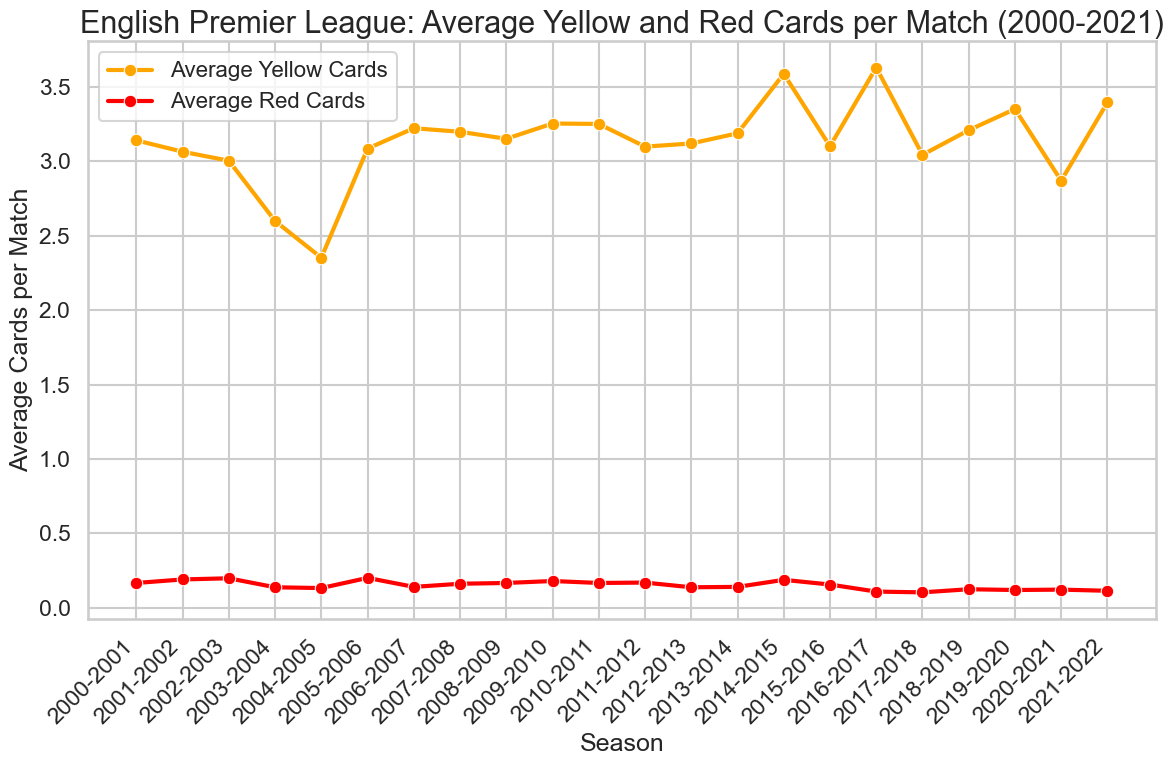

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv("Premier_League_data/total_with_rank.csv")
df = df[df["Season"] != "2022-2023"]

# 计算每个赛季的平均红黄牌数量
average_cards = df.groupby("Season")["YellowCards", "RedCards"].sum() / 380
average_cards = average_cards.reset_index()

# 打印每个赛季平均每场比赛的红黄牌数量
for i in range(len(average_cards)):
    season = average_cards.loc[i, "Season"]
    yellow_cards = average_cards.loc[i, "YellowCards"]
    red_cards = average_cards.loc[i, "RedCards"]
    print(f"{season}: Yellow Cards - {yellow_cards:.2f}, Red Cards - {red_cards:.2f}")

# 设置图表样式
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.set_context("talk")

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制折线图
sns.lineplot(x="Season", y="YellowCards", data=average_cards, marker='o', linewidth=3, linestyle='-', label="Average Yellow Cards", color="orange")
sns.lineplot(x="Season", y="RedCards", data=average_cards, marker='o', linewidth=3, linestyle='-', label="Average Red Cards", color="red")

# 添加标题和轴标签
ax.set_xlabel("Season", fontsize=18)
ax.set_ylabel("Average Cards per Match", fontsize=18)
ax.set_title("English Premier League: Average Yellow and Red Cards per Match (2000-2021)", fontsize=22)

# 旋转x轴标签
plt.xticks(rotation=45, ha="right")

# 添加图例
ax.legend(fontsize=16)

# 添加网格线
ax.grid(True)

# 调整图像边缘
plt.tight_layout()

# 显示图像
plt.show()


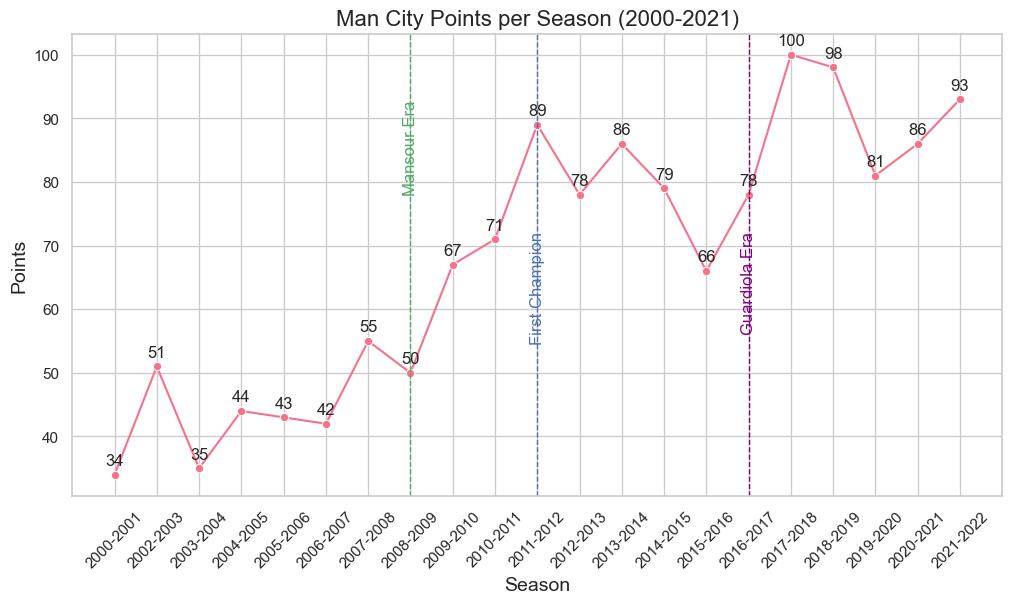

In [39]:
# 10.曼城各赛季积分变化
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl", 6)

df = pd.read_csv("Premier_League_data/total_with_rank.csv")

team_name = "Man City"
team_df = df[df["Team"] == team_name]

# 仅包含 2000-2021 赛季的数据
team_df = team_df[team_df['Season'] != '2022-2023']

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=team_df["Season"], y=team_df["Points"], marker="o")
plt.xticks(rotation=45)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Points", fontsize=14)
plt.title(f"{team_name} Points per Season (2000-2021)", fontsize=16)

# 标出曼城在曼苏尔入主的时间
mansour_start = "2008-2009"
plt.axvline(x=mansour_start, color='g', linestyle='--', linewidth=1)
plt.text(mansour_start, ax.get_ylim()[1] * 0.9, "Mansour Era", fontsize=12, color='g', rotation=90, ha="center", va="top")

# 标出瓜迪奥拉执教的时间节点
guardiola_start = "2016-2017"
plt.axvline(x=guardiola_start, color='purple', linestyle='--', linewidth=1)
plt.text(guardiola_start, ax.get_ylim()[1] * 0.7, "Guardiola Era", fontsize=12, color='purple', rotation=90, ha="center", va="top")

# 标出曼城在被收购后首次获得英超冠军的时间点
first_title = "2011-2012"
plt.axvline(x=first_title, color='b', linestyle='--', linewidth=1)
plt.text(first_title, ax.get_ylim()[1] * 0.7, "First Champion", fontsize=12, color='b', rotation=90, ha="center", va="top")

# 添加得分标签
for season, points in zip(team_df["Season"], team_df["Points"]):
    plt.text(season, points + 1, f"{points}", ha='center', va='bottom', fontsize=12)

plt.show()


In [33]:
import pandas as pd

# 读取 total_with_rank.csv 文件
df = pd.read_csv("Premier_League_data/total_with_rank.csv")

# 提取唯一的球队名称
unique_teams = df["Team"].nunique()

print(f"在近22年的英超联赛中，共有 {unique_teams} 个不同的球队参加。")


在近22年的英超联赛中，共有 45 个不同的球队参加。


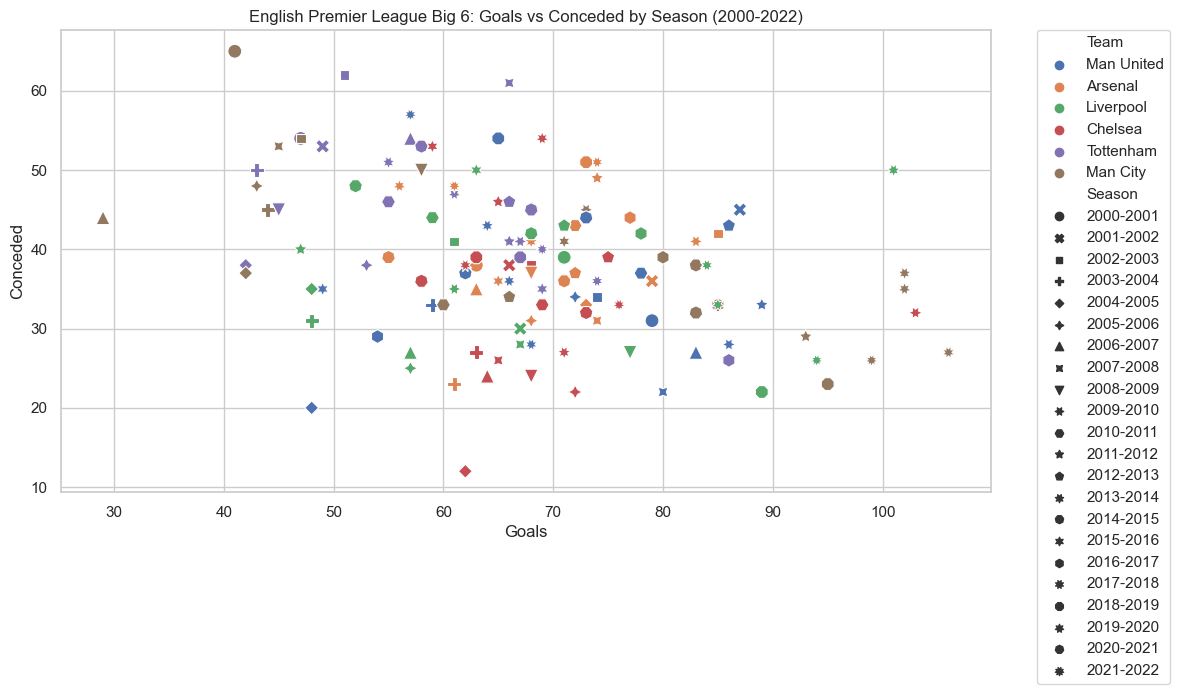

In [24]:
# 每个赛季各队进球数与失球数散点图优化：
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Premier_League_data/total_with_rank.csv")
big_6 = ["Man United", "Arsenal", "Chelsea", "Liverpool", "Man City", "Tottenham"]
big_6_df = df[df["Team"].isin(big_6)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=big_6_df, x="Goals", y="Conceded", hue="Team", style="Season", s=100)
plt.xlabel("Goals")
plt.ylabel("Conceded")
plt.title("English Premier League Big 6: Goals vs Conceded by Season (2000-2022)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
